**Python for Business Insights**

# **Modelos Predictivos para la Detección de Fraudes en Reclamaciones de Seguros de Autos**

#**Exploración de Datos**

## **Diccionario de Variables**

| **Variable**               | **Descripción**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Month**                 | El mes en que ocurrió el accidente.                                              |
| **WeekOfMonth**           | La semana del mes en que ocurrió el accidente.                                   |
| **DayOfWeek**             | El día de la semana en que ocurrió el accidente.                                 |
| **Make**                  | El fabricante del vehículo involucrado en el accidente (ejemplo: Honda, Ford, Toyota, etc.). |
| **AccidentArea**          | Indica si el accidente ocurrió en una zona urbana o rural.                       |
| **DayOfWeekClaimed**      | El día de la semana en que se presentó la reclamación del seguro.                |
| **MonthClaimed**          | El mes en que se presentó la reclamación del seguro.                             |
| **WeekOfMonthClaimed**    | La semana del mes en que se presentó la reclamación del seguro.                  |
| **Sex**                   | El género del titular de la póliza (Masculino o Femenino).                       |
| **MaritalStatus**         | El estado civil del titular de la póliza.                                        |
| **Age**                   | La edad del titular de la póliza.                                                |
| **Fault**                 | Indica quién fue el culpable del accidente (ejemplo: Titular de la póliza, Tercero). |
| **PolicyType**            | El tipo de póliza de seguro que tiene el titular (ejemplo: Sport, Sedán, Utilitario). |
| **VehicleCategory**       | La categoría del vehículo asegurado (ejemplo: Sport, Sedán, Utilitario).         |
| **VehiclePrice**          | El rango de precio del vehículo asegurado (ejemplo: 20,000 a 29,000, más de 69,000). |
| **PolicyNumber**          | Un número único que identifica la póliza de seguro.                              |
| **RepNumber**             | Número de representante (parece estar sin descripción en la tabla).              |
| **Deductible**            | La cantidad deducible que el titular debe pagar antes de que el seguro cubra los costos restantes. |
| **DriverRating**          | Una calificación que evalúa el desempeño de seguridad del conductor.             |
| **Days:Policy-Accident**  | El número de días entre el inicio de la póliza y el accidente.                   |
| **Days:Policy-Claim**     | El número de días entre el inicio de la póliza y la presentación de la reclamación. |
| **PastNumberOfClaims**    | El número de reclamos anteriores realizados por el titular de la póliza.         |
| **AgeOfVehicle**          | La antigüedad del vehículo asegurado.                                            |
| **AgeOfPolicyHolder**     | La categoría de edad del titular de la póliza (ejemplo: 26 a 30, 31 a 35, etc.). |
| **PoliceReportFiled**     | Indica si se presentó un informe policial por el accidente (Sí, No).             |
| **WitnessPresent**        | Indica si hubo un testigo presente en el momento del accidente (Sí, No).         |
| **AgentType**             | El tipo de agente de seguros (ejemplo: Externo, Interno).                        |
| **NumberOfSupplements**   | El número de documentos adicionales o suplementos presentados con la reclamación. |
| **AddressChange-Claim**   | Indica si la dirección del titular de la póliza cambió después de presentar la reclamación. |
| **NumberOfCars**          | El número de vehículos que posee el titular de la póliza.                        |
| **Year**                  | El año en que ocurrió el accidente.                                              |
| **BasePolicy**            | El tipo básico de cobertura del seguro (ejemplo: Responsabilidad, Colisión, Cobertura Total). |
| **FraudFound**            | Indica si la reclamación se consideró fraudulenta (Sí, No).                      |


In [ ]:
#Librerías para manipulación de datos
import pandas as pd
import numpy as np

#Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para análisis de series de tiempo
import statsmodels.api as sm

!pip install shap # install the shap module
# Restart the kernel after installing the module.
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
!pip install numpy==2.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.0 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.0.0 which is incompatible.
pytensor 2.25.4 requires numpy<2,>=1.17.0, but you have numpy 2.0.0 which is incompatible.
rmm-cu12 24.4.0 requires numpy<

In [ ]:
#pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv('fraud.csv')

In [ ]:
data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Yes             No  External   
2           41 to 50                No             No  External   
3           51 to 65               Yes             No  External   
4           31 to 35                No             No  External   

  NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  BasePolicy  \
0                none               1 year        3 to 4  1994   Liability   
1                none            no change     1 vehicle  1994   Collision   
2                none            no change     1 vehicle  1994   Collision   
3         more than 5            no change     1 vehicle  1994   Liability   
4                none            no change     1 vehicle  1994   Collision   

  FraudFound  
0         No  
1         No  
2         No  
3         No  
4         No  

[5 rows x 33 columns]

In [ ]:
data.shape

(15420, 33)

* Hay un total de 15420 registros y 33 columnas.


##**Tipos de Variables**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

* No hay nulos.

##**Variable target**

In [ ]:
data["FraudFound"].value_counts(normalize=False)

FraudFound
No     14497
Yes      923
Name: count, dtype: int64

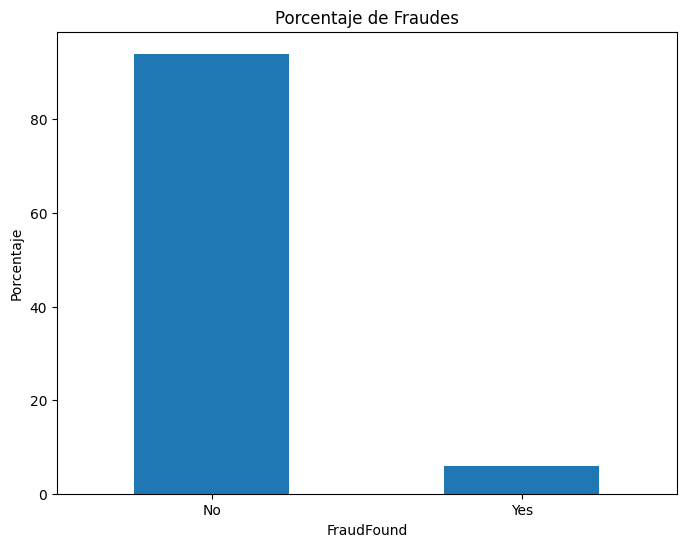

In [ ]:
# Calculate the percentage of each value in "FraudFound"
fraud_found_percentage = data["FraudFound"].value_counts(normalize=True) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
fraud_found_percentage.plot(kind="bar")
plt.title("Porcentaje de Fraudes")
plt.xlabel("FraudFound")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.show()


In [ ]:
if data['FraudFound'].dtype == 'object':
    data['FraudFound'] = data['FraudFound'].map({'No': 0, 'Yes': 1})

In [ ]:
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  categorias = data[column].unique()
  print(categorias)


Variable: Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

Variable: DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Variable: Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

Variable: AccidentArea
['Urban' 'Rural']

Variable: DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

Variable: MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Variable: Sex
['Female' 'Male']

Variable: MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Variable: Fault
['Policy Holder' 'Third Party']

Variable: PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

Variable: VehicleC

In [ ]:
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = data[column].value_counts()
  percentage = (value_counts / len(data)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)


Variable: Month
       Count  Percentage
Month                   
Jan     1411         9.2
May     1367         8.9
Mar     1360         8.8
Jun     1321         8.6
Oct     1305         8.5
Dec     1285         8.3
Apr     1280         8.3
Feb     1266         8.2
Jul     1257         8.2
Sep     1240         8.0
Nov     1201         7.8
Aug     1127         7.3

Variable: DayOfWeek
           Count  Percentage
DayOfWeek                   
Monday      2616        17.0
Friday      2445        15.9
Tuesday     2300        14.9
Thursday    2173        14.1
Wednesday   2159        14.0
Saturday    1982        12.9
Sunday      1745        11.3

Variable: Make
           Count  Percentage
Make                        
Pontiac     3837        24.9
Toyota      3121        20.2
Honda       2801        18.2
Mazda       2354        15.3
Chevrolet   1681        10.9
Accura       472         3.1
Ford         450         2.9
VW           283         1.8
Dodge        109         0.7
Saab         108

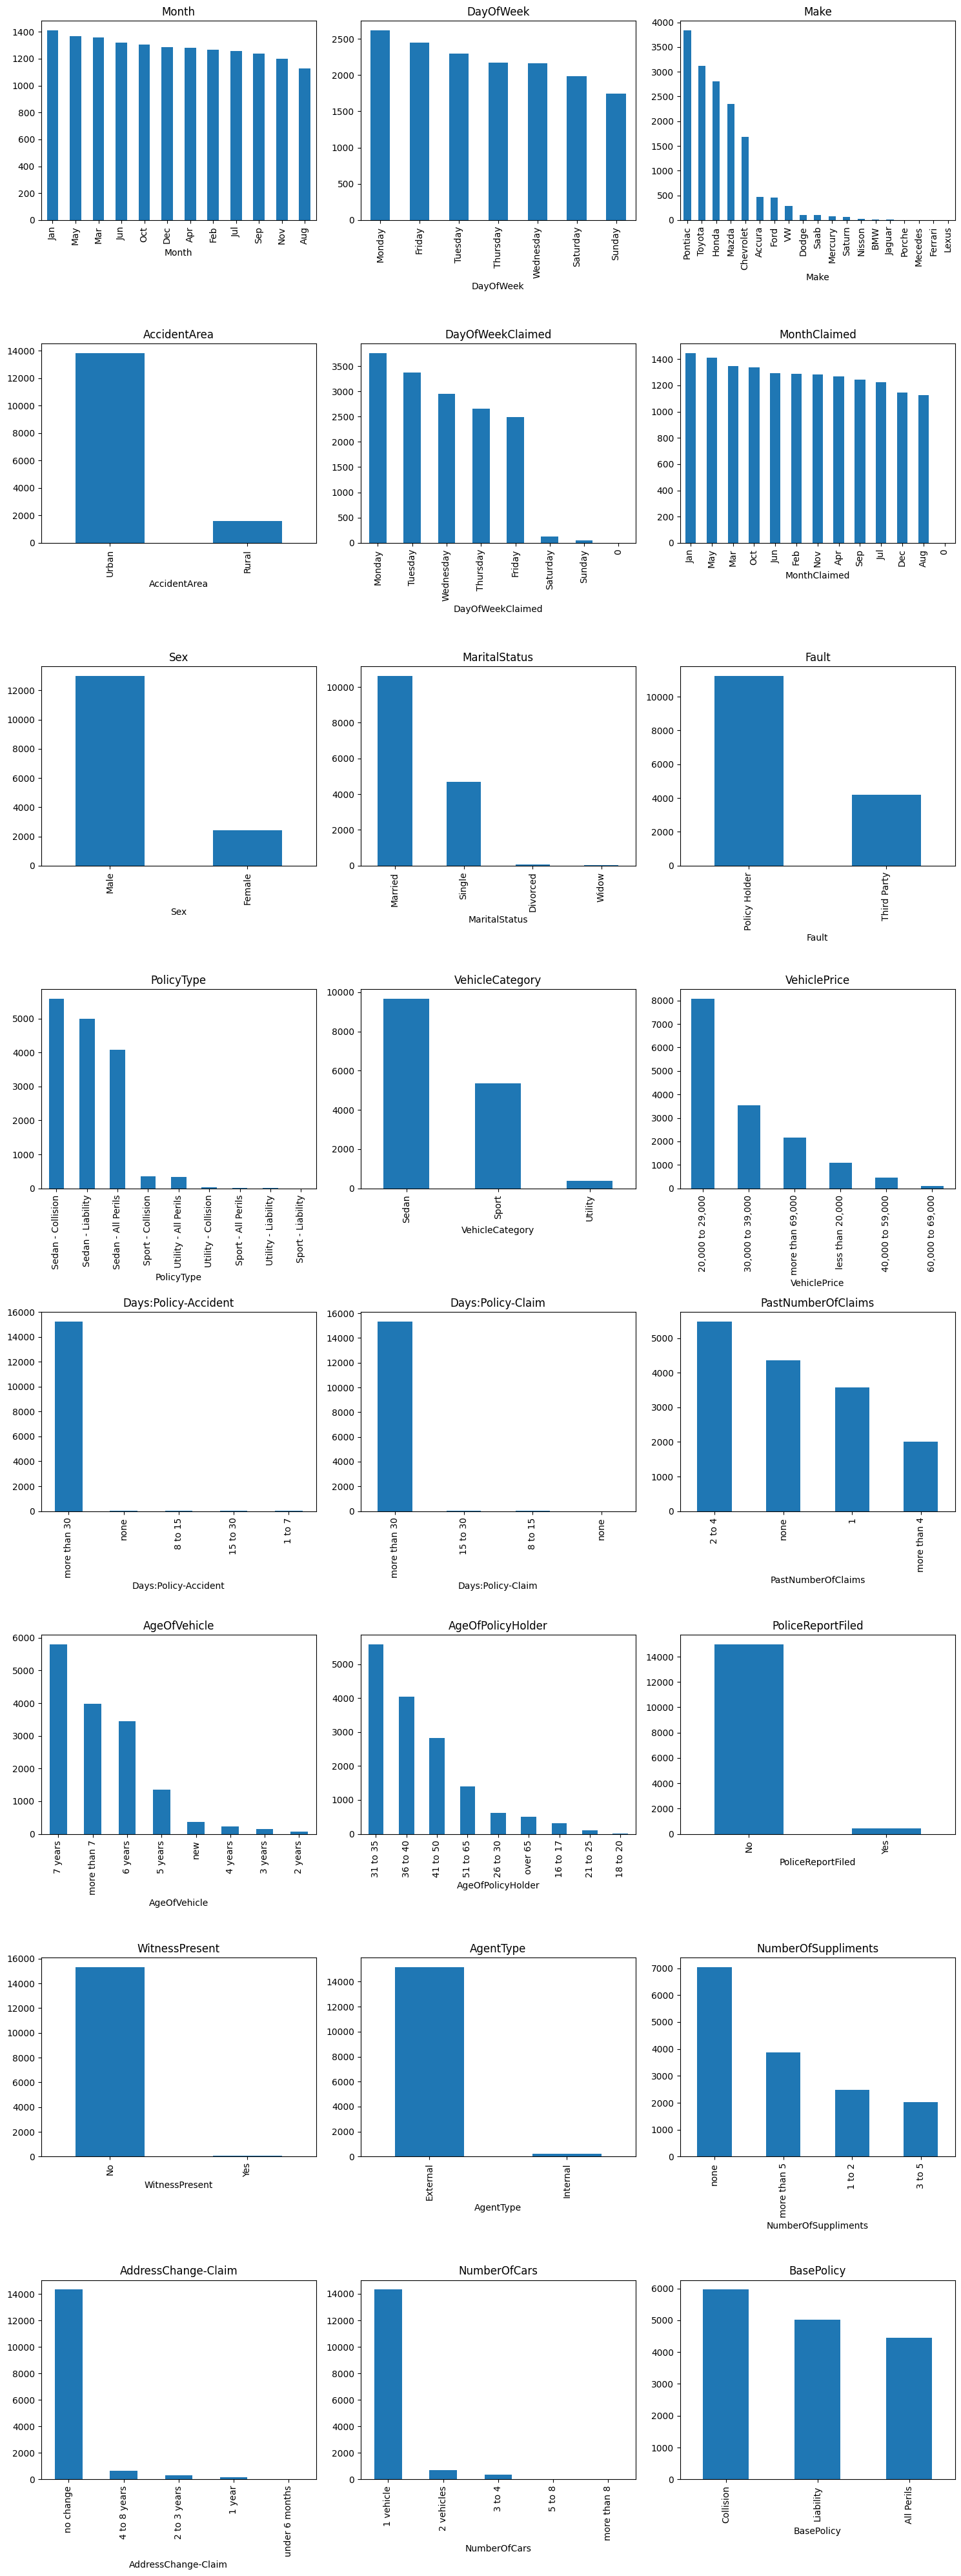

In [ ]:
# prompt: hacer graficos de barra de las variables categoricas, en 3 columnas.

import matplotlib.pyplot as plt

categorical_cols = data.select_dtypes(include=['object']).columns
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3
    data[col].value_counts().plot(kind='bar', ax=axes[row, col_idx], title=col)

# Remove any unused subplots
for i in range(num_cols, num_rows * 3):
    row = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()


#**Splitting**

In [ ]:
!pip install scikit-learn # install the scikit-learn library that contains the train_test_split function.
from sklearn.model_selection import train_test_split # imports the function

In [ ]:
#data1, data2 = train_test_split(data, test_size=0.5, random_state=1, stratify=data[['Month', 'AccidentArea','Sex']])

In [ ]:
#data1["FraudFound"].value_counts(normalize=True).round(2)

In [ ]:
#data2["FraudFound"].value_counts(normalize=True).round(2)

In [ ]:
#data2.to_csv("leftover.csv", index=False)

In [ ]:
#data1.to_csv("workshop_data.csv", index=False)

In [ ]:
#data = pd.read_csv("workshop_data.csv")

In [ ]:
data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Yes             No  External   
2           41 to 50                No             No  External   
3           51 to 65               Yes             No  External   
4           31 to 35                No             No  External   

  NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  BasePolicy  \
0                none               1 year        3 to 4  1994   Liability   
1                none            no change     1 vehicle  1994   Collision   
2                none            no change     1 vehicle  1994   Collision   
3         more than 5            no change     1 vehicle  1994   Liability   
4                none            no change     1 vehicle  1994   Collision   

  FraudFound  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 33 columns]

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [ ]:
estratos = ['Month','FraudFound']

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data[estratos], random_state=1)

In [ ]:
val_data, test_data = train_test_split(temp_data, test_size=0.50, stratify=temp_data[estratos], random_state=1)

In [ ]:
test_data.to_csv("test_data.csv", index=False)

In [ ]:
train_data.head()

Month  WeekOfMonth DayOfWeek       Make AccidentArea DayOfWeekClaimed  \
6468    Aug            4  Saturday    Pontiac        Rural          Tuesday   
2151    Mar            2   Tuesday  Chevrolet        Urban          Tuesday   
14698   Nov            2    Sunday  Chevrolet        Urban          Tuesday   
11825   Jan            5  Saturday         VW        Urban           Monday   
13658   Dec            5    Friday     Accura        Urban        Wednesday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  \
6468           Aug                   5  Male       Married  ...   
2151           Mar                   3  Male       Married  ...   
14698          Nov                   4  Male       Married  ...   
11825          Feb                   1  Male       Married  ...   
13658          Jan                   1  Male       Married  ...   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
6468            31 to 35                No             No  External   
2151            36 to 40                No             No  External   
14698           41 to 50                No             No  External   
11825            over 65                No             No  External   
13658           41 to 50                No             No  External   

      NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  \
6468                 none         4 to 8 years    2 vehicles  1995   
2151                 none            no change     1 vehicle  1994   
14698              1 to 2            no change     1 vehicle  1996   
11825              1 to 2            no change     1 vehicle  1996   
13658                none            no change     1 vehicle  1996   

       BasePolicy FraudFound  
6468    Collision          0  
2151   All Perils          0  
14698  All Perils          0  
11825  All Perils          0  
13658  All Perils          0  

[5 rows x 33 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10794 entries, 6468 to 13838
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 10794 non-null  object
 1   WeekOfMonth           10794 non-null  int64 
 2   DayOfWeek             10794 non-null  object
 3   Make                  10794 non-null  object
 4   AccidentArea          10794 non-null  object
 5   DayOfWeekClaimed      10794 non-null  object
 6   MonthClaimed          10794 non-null  object
 7   WeekOfMonthClaimed    10794 non-null  int64 
 8   Sex                   10794 non-null  object
 9   MaritalStatus         10794 non-null  object
 10  Age                   10794 non-null  int64 
 11  Fault                 10794 non-null  object
 12  PolicyType            10794 non-null  object
 13  VehicleCategory       10794 non-null  object
 14  VehiclePrice          10794 non-null  object
 15  PolicyNumber          10794 non-null  

In [ ]:
train_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

# **Análisis exploratorio**

## **Análisis univariado**

In [ ]:
for column in train_data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  value_counts = train_data[column].value_counts()
  percentage = (value_counts / len(data)) * 100
  df_counts = pd.concat([value_counts, percentage.round(1)], axis=1)
  df_counts.columns = ['Count', 'Percentage']
  print(df_counts)


Variable: Month
       Count  Percentage
Month                   
Jan      988         6.4
May      957         6.2
Mar      952         6.2
Jun      925         6.0
Oct      914         5.9
Dec      899         5.8
Apr      896         5.8
Feb      886         5.7
Jul      880         5.7
Sep      868         5.6
Nov      840         5.4
Aug      789         5.1

Variable: DayOfWeek
           Count  Percentage
DayOfWeek                   
Monday      1836        11.9
Friday      1683        10.9
Tuesday     1569        10.2
Thursday    1532         9.9
Wednesday   1526         9.9
Saturday    1407         9.1
Sunday      1241         8.0

Variable: Make
           Count  Percentage
Make                        
Pontiac     2691        17.5
Toyota      2206        14.3
Honda       1951        12.7
Mazda       1659        10.8
Chevrolet   1162         7.5
Accura       329         2.1
Ford         296         1.9
VW           210         1.4
Dodge         78         0.5
Saab          72

## **Análisis bivariado**

In [ ]:
for column in train_data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  cruce = train_data.groupby(column)["FraudFound"].value_counts(normalize=True).round(2)
  print(cruce)


Variable: Month
Month  FraudFound
Apr    0             0.94
       1             0.06
Aug    0             0.93
       1             0.07
Dec    0             0.95
       1             0.05
Feb    0             0.94
       1             0.06
Jan    0             0.94
       1             0.06
Jul    0             0.95
       1             0.05
Jun    0             0.94
       1             0.06
Mar    0             0.93
       1             0.07
May    0             0.93
       1             0.07
Nov    0             0.96
       1             0.04
Oct    0             0.95
       1             0.05
Sep    0             0.94
       1             0.06
Name: proportion, dtype: float64

Variable: DayOfWeek
DayOfWeek  FraudFound
Friday     0             0.94
           1             0.06
Monday     0             0.94
           1             0.06
Saturday   0             0.93
           1             0.07
Sunday     0             0.93
           1             0.07
Thursday   0             

* Tiene cambios: 'Make','DayOfWeekClaimed','MaritalStatus','Fault',VehicleCategory,VehiclePrice,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,BasePolicy

## **Análisis de tres variables**

* **'PolicyType' y 'VehiclePrice'**\
Diferentes tipos de pólizas pueden asociarse con distintos niveles de riesgo. Por ejemplo, las pólizas de "todos los riesgos" suelen estar más expuestas a reclamos fraudulentos, especialmente en vehículos de alto precio.

* **'Days' y 'PastNumberOfClaims'**\
Un historial de múltiples reclamos puede indicar un mayor riesgo de fraude, particularmente si los reclamos se presentan en un corto período de tiempo.

* **'AgeOfPolicyHolder' y 'MaritalStatus2'**\
El estado civil puede influir en el comportamiento de conducción y en la frecuencia de presentación de reclamos. Por ejemplo, los conductores jóvenes y solteros tienden a presentar más reclamos.

* **'AccidentArea' y 'Fault'**\
Las áreas urbanas presentan diferentes patrones de accidentes en comparación con las rurales. Esto puede influir en la responsabilidad y en los tipos de fraude que se manifiestan.

* **'WitnessPresent' y 'PoliceReportFiled'**\
La presencia de testigos y la presentación de un informe policial pueden indicar la seriedad del reclamo. La falta de ambos elementos podría ser un indicativo de fraude.

* **'NumberOfCars' y 'Vehiculo_mayor5'**\
La cantidad de vehículos asegurados y su antigüedad pueden proporcionar información sobre la estrategia del asegurado. Un mayor número de vehículos antiguos podría estar asociado con intentos de fraude.

* **'BasePolicy' y 'VehicleCategory'**\
Diferentes categorías de vehículos pueden relacionarse con distintos tipos de pólizas, y ciertas combinaciones pueden revelar patrones de fraude.

* **'DayOfWeekClaimed' y 'Trim_Claimed'**\
Los patrones de fraude pueden variar según el día de la semana o el mes, posiblemente vinculados a comportamientos estacionales o eventos específicos.

* **'Make_lujo' y 'VehiclePrice'**\
Las marcas de vehículos pueden tener diferentes tasas de reclamos y riesgos asociados. Los vehículos más caros tienden a estar más expuestos a fraudes.

* **'AgentType' y 'NumberOfSuppliments'**\
La interacción con agentes, ya sean internos o externos, y la cantidad de suplementos pueden proporcionar información sobre la complejidad del caso, lo que podría aumentar el riesgo de fraude.

* **'Sex' y 'AgeOfPolicyHolder'**\
Las diferencias demográficas pueden influir en el comportamiento de reclamos. Por ejemplo, ciertos grupos pueden presentar más reclamos fraudulentos que otros.

* **'AccidentArea' y 'Days'**\
La ubicación del accidente y la duración de la póliza pueden estar relacionadas con el tipo de reclamación presentada. Las áreas rurales podrían tener menos denuncias, pero una mayor incidencia de fraude.

* **'AddressChange-Claim2' y 'NumberOfCars'**\
Un cambio de dirección reciente podría sugerir un intento de ocultar información, especialmente si se asocia con múltiples vehículos.

* **'PoliceReportFiled' y 'Days'**\
La presentación de un informe policial y la duración de la reclamación pueden estar correlacionadas, lo que indica si la reclamación es legítima o fraudulenta.

* **'Fault' y 'PolicyType'**\
La asignación de culpa y el tipo de póliza pueden ayudar a identificar patrones, donde ciertos tipos de pólizas podrían ser más susceptibles a fraudes según quién se considera responsable.

In [ ]:
# Suponiendo que tienes un DataFrame llamado train_data
# Sustituye train_data con el nombre de tu DataFrame

# 1. Combinación: 'PolicyType' y 'VehiclePrice'
policy_vehicle_price = train_data.groupby(['PolicyType','VehiclePrice'])['FraudFound'].value_counts(normalize=True).reset_index()
policy_vehicle_price_found = policy_vehicle_price[policy_vehicle_price['FraudFound'] == 1].set_index(['PolicyType','VehiclePrice'])
print("Combinación: 'PolicyType' y 'VehiclePrice'")
print(policy_vehicle_price_found)
print("\n")


# 2. Combinación: 'Days:Policy-Claim' y 'PastNumberOfClaims'
days_claim_past_claims = train_data.groupby(['Days:Policy-Claim', 'PastNumberOfClaims'])['FraudFound'].value_counts(normalize=True).reset_index()
days_claim_past_claims_found = days_claim_past_claims[days_claim_past_claims['FraudFound'] == 1].set_index(['Days:Policy-Claim', 'PastNumberOfClaims'])
print("Combinación: 'Days:Policy-Claim' y 'PastNumberOfClaims'")
print(days_claim_past_claims_found)
print("\n")


# 3. Combinación: 'AgeOfPolicyHolder' y 'MaritalStatus'
age_marital_status = train_data.groupby(['AgeOfPolicyHolder', 'MaritalStatus'])['FraudFound'].value_counts(normalize=True).reset_index()
age_marital_status_found = age_marital_status[age_marital_status['FraudFound'] == 1].set_index(['AgeOfPolicyHolder', 'MaritalStatus'])
print("Combinación: 'AgeOfPolicyHolder' y 'MaritalStatus'")
print(age_marital_status_found)
print("\n")


# 4. Combinación: 'AccidentArea' y 'Fault'
accident_fault = train_data.groupby(['AccidentArea', 'Fault'])['FraudFound'].value_counts(normalize=True).reset_index()
accident_fault_found = accident_fault[accident_fault['FraudFound'] == 1].set_index(['AccidentArea', 'Fault'])
print("Combinación: 'AccidentArea' y 'Fault'")
print(accident_fault_found)
print("\n")


# 5. Combinación: 'WitnessPresent' y 'PoliceReportFiled'
witness_police_report = train_data.groupby(['WitnessPresent', 'PoliceReportFiled'])['FraudFound'].value_counts(normalize=True).reset_index()
witness_police_report_found = witness_police_report[witness_police_report['FraudFound'] == 1].set_index(['WitnessPresent', 'PoliceReportFiled'])
print("Combinación: 'WitnessPresent' y 'PoliceReportFiled'")
print(witness_police_report_found)
print("\n")


# 6. Combinación: 'NumberOfCars' y 'AgeOfVehicle'
cars_age_vehicle = train_data.groupby(['NumberOfCars', 'AgeOfVehicle'])['FraudFound'].value_counts(normalize=True).reset_index()
cars_age_vehicle_found = cars_age_vehicle[cars_age_vehicle['FraudFound'] == 1].set_index(['NumberOfCars', 'AgeOfVehicle'])
print("Combinación: 'NumberOfCars' y 'AgeOfVehicle'")
print(cars_age_vehicle_found)
print("\n")


# 7. Combinación: 'BasePolicy' y 'VehicleCategory'
base_vehicle_category = train_data.groupby(['BasePolicy', 'VehicleCategory'])['FraudFound'].value_counts(normalize=True).reset_index()
base_vehicle_category_found = base_vehicle_category[base_vehicle_category['FraudFound'] == 1].set_index(['BasePolicy', 'VehicleCategory'])
print("Combinación: 'BasePolicy' y 'VehicleCategory'")
print(base_vehicle_category_found)
print("\n")


# 8. Combinación: 'DayOfWeekClaimed' y 'MonthClaimed'
day_month_claimed = train_data.groupby(['DayOfWeekClaimed', 'MonthClaimed'])['FraudFound'].value_counts(normalize=True).reset_index()
day_month_claimed_found = day_month_claimed[day_month_claimed['FraudFound'] == 1].set_index(['DayOfWeekClaimed', 'MonthClaimed'])
print("Combinación: 'DayOfWeekClaimed' y 'MonthClaimed'")
print(day_month_claimed_found)
print("\n")


# 9. Combinación: 'Make' y 'VehiclePrice'
make_vehicle_price = train_data.groupby(['Make', 'VehiclePrice'])['FraudFound'].value_counts(normalize=True).reset_index()
make_vehicle_price_found = make_vehicle_price[make_vehicle_price['FraudFound'] == 1].set_index(['Make', 'VehiclePrice'])
print("Combinación: 'Make' y 'VehiclePrice'")
print(make_vehicle_price_found)
print("\n")


# 10. Combinación: 'AgentType' y 'NumberOfSuppliments'
agent_suppliments = train_data.groupby(['AgentType', 'NumberOfSuppliments'])['FraudFound'].value_counts(normalize=True).reset_index()
agent_suppliments_found = agent_suppliments[agent_suppliments['FraudFound'] == 1].set_index(['AgentType', 'NumberOfSuppliments'])
print("Combinación: 'AgentType' y 'NumberOfSuppliments'")
print(agent_suppliments_found)
print("\n")


# 11. Combinación: 'Sex' y 'AgeOfPolicyHolder'
sex_age_policy_holder = train_data.groupby(['Sex', 'AgeOfPolicyHolder'])['FraudFound'].value_counts(normalize=True).reset_index()
sex_age_policy_holder_found = sex_age_policy_holder[sex_age_policy_holder['FraudFound'] == 1].set_index(['Sex', 'AgeOfPolicyHolder'])
print("Combinación: 'Sex' y 'AgeOfPolicyHolder'")
print(sex_age_policy_holder_found)
print("\n")


# 12. Combinación: 'AccidentArea' y 'Days:Policy-Accident'
accident_days_policy = train_data.groupby(['AccidentArea', 'Days:Policy-Accident'])['FraudFound'].value_counts(normalize=True).reset_index()
accident_days_policy_found = accident_days_policy[accident_days_policy['FraudFound'] == 1].set_index(['AccidentArea', 'Days:Policy-Accident'])
print("Combinación: 'AccidentArea' y 'Days:Policy-Accident'")
print(accident_days_policy_found)
print("\n")


# 13. Combinación: 'AddressChange-Claim' y 'NumberOfCars'
address_cars = train_data.groupby(['AddressChange-Claim', 'NumberOfCars'])['FraudFound'].value_counts(normalize=True).reset_index()
address_cars_found = address_cars[address_cars['FraudFound'] == 1].set_index(['AddressChange-Claim', 'NumberOfCars'])
print("Combinación: 'AddressChange-Claim' y 'NumberOfCars'")
print(address_cars_found)
print("\n")


# 14. Combinación: 'PoliceReportFiled' y 'Days:Policy-Claim'
police_days_claim = train_data.groupby(['PoliceReportFiled', 'Days:Policy-Claim'])['FraudFound'].value_counts(normalize=True).reset_index()
police_days_claim_found = police_days_claim[police_days_claim['FraudFound'] == 1].set_index(['PoliceReportFiled', 'Days:Policy-Claim'])
print("Combinación: 'PoliceReportFiled' y 'Days:Policy-Claim'")
print(police_days_claim_found)
print("\n")


# 15. Combinación: 'Fault' y 'PolicyType'
fault_policy_type = train_data.groupby(['Fault', 'PolicyType'])['FraudFound'].value_counts(normalize=True).reset_index()
fault_policy_type_found = fault_policy_type[fault_policy_type['FraudFound'] == 1].set_index(['Fault', 'PolicyType'])
print("Combinación: 'Fault' y 'PolicyType'")
print(fault_policy_type_found)
print("\n")


Combinación: 'PolicyType' y 'VehiclePrice'
                                       FraudFound  proportion
PolicyType           VehiclePrice                            
Sedan - All Perils   20,000 to 29,000           1    0.101626
                     30,000 to 39,000           1    0.075724
                     40,000 to 59,000           1    0.163636
                     60,000 to 69,000           1    0.090909
                     less than 20,000           1    0.110476
                     more than 69,000           1    0.129032
Sedan - Collision    20,000 to 29,000           1    0.055959
                     30,000 to 39,000           1    0.080695
                     40,000 to 59,000           1    0.102564
                     60,000 to 69,000           1    0.076923
                     less than 20,000           1    0.062857
                     more than 69,000           1    0.071429
Sedan - Liability    20,000 to 29,000           1    0.005940
                     30,000

## **Análisis descriptivo**

In [ ]:
train_data.describe().round(2)

WeekOfMonth  WeekOfMonthClaimed       Age  PolicyNumber  RepNumber  \
count     10794.00            10794.00  10794.00      10794.00   10794.00   
mean          2.80                2.71     39.89       7713.68       8.49   
std           1.29                1.26     13.42       4461.27       4.58   
min           1.00                1.00      0.00          1.00       1.00   
25%           2.00                2.00     31.00       3825.25       5.00   
50%           3.00                3.00     38.00       7711.50       8.00   
75%           4.00                4.00     48.00      11586.50      12.00   
max           5.00                5.00     80.00      15420.00      16.00   

       Deductible  DriverRating      Year  FraudFound  
count    10794.00      10794.00  10794.00    10794.00  
mean       407.56          2.50   1994.87        0.06  
std         43.50          1.12      0.80        0.24  
min        300.00          1.00   1994.00        0.00  
25%        400.00          1.00   1994.00        0.00  
50%        400.00          3.00   1995.00        0.00  
75%        400.00          4.00   1996.00        0.00  
max        700.00          4.00   1996.00        1.00

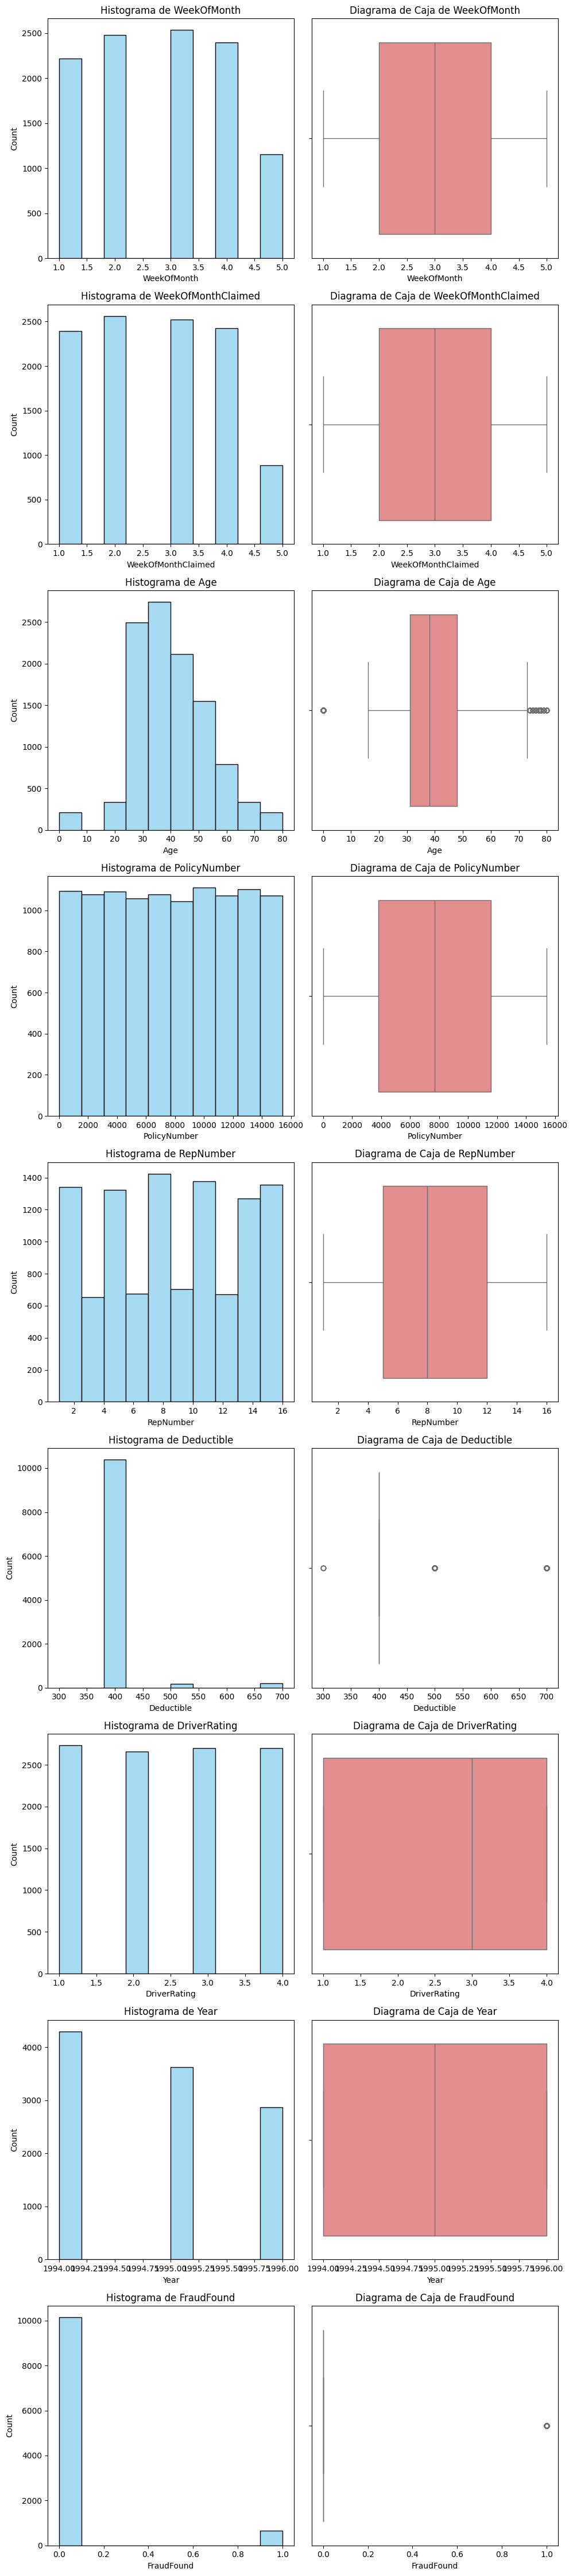

In [ ]:
# Filtrar solo las columnas numéricas
numeric_columns = train_data.describe().columns

# Definir el tamaño de la figura (ajustado para no ser demasiado grande)
plt.figure(figsize=(10, len(numeric_columns) * 5))

# Iterar sobre cada columna numérica
for i, col in enumerate(numeric_columns):
    # Crear el histograma
    plt.subplot(len(numeric_columns), 2, 2*i+1)
    sns.histplot(train_data[col], bins=10, kde=False, color='skyblue')
    plt.title(f'Histograma de {col}')

    # Crear el diagrama de caja (boxplot)
    plt.subplot(len(numeric_columns), 2, 2*i+2)
    sns.boxplot(x=train_data[col], color='lightcoral')
    plt.title(f'Diagrama de Caja de {col}')

# Ajustar el layout para que las gráficas no se solapen
plt.tight_layout()
plt.show()

## **Análisis descriptivo vs. FraudFound**

In [ ]:
# Estadísticas descriptivas para todas las variables numéricas agrupadas por 'FraudFound'
description = train_data.groupby("FraudFound").describe()

# Mostramos las estadísticas descriptivas
print(description)


           WeekOfMonth                                               \
                 count      mean       std  min  25%  50%  75%  max   
FraudFound                                                            
0              10149.0  2.801458  1.290521  1.0  2.0  3.0  4.0  5.0   
1                645.0  2.703876  1.263708  1.0  2.0  3.0  4.0  5.0   

           WeekOfMonthClaimed            ... DriverRating          Year  \
                        count      mean  ...          75%  max    count   
FraudFound                               ...                              
0                     10149.0  2.708543  ...          3.0  4.0  10149.0   
1                       645.0  2.705426  ...          4.0  4.0    645.0   

                                                                           
                   mean       std     min     25%     50%     75%     max  
FraudFound                                                                 
0           1994.872106  0.804868  1994.

In [ ]:
train_data["AgeBucket"] = pd.cut(train_data["Age"], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"], right=True)
train_data["AgeBucket"].value_counts(normalize=True).round(2)

AgeBucket
31-40    0.32
41-50    0.23
21-30    0.22
51-60    0.14
61-70    0.06
71-80    0.02
0-20     0.01
Name: proportion, dtype: float64

In [ ]:
train_data.groupby("AgeBucket")["FraudFound"].value_counts(normalize=True)

<ipython-input-37-8a6b7818728e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby("AgeBucket")["FraudFound"].value_counts(normalize=True)


AgeBucket  FraudFound
0-20       0             0.852273
           1             0.147727
21-30      0             0.939865
           1             0.060135
31-40      0             0.931208
           1             0.068792
41-50      0             0.945912
           1             0.054088
51-60      0             0.953804
           1             0.046196
61-70      0             0.950000
           1             0.050000
71-80      0             0.961373
           1             0.038627
Name: proportion, dtype: float64

In [ ]:
train_data.groupby("FraudFound").describe()

WeekOfMonth                                               \
                 count      mean       std  min  25%  50%  75%  max   
FraudFound                                                            
0              10149.0  2.801458  1.290521  1.0  2.0  3.0  4.0  5.0   
1                645.0  2.703876  1.263708  1.0  2.0  3.0  4.0  5.0   

           WeekOfMonthClaimed            ... DriverRating          Year  \
                        count      mean  ...          75%  max    count   
FraudFound                               ...                              
0                     10149.0  2.708543  ...          3.0  4.0  10149.0   
1                       645.0  2.705426  ...          4.0  4.0    645.0   

                                                                           
                   mean       std     min     25%     50%     75%     max  
FraudFound                                                                 
0           1994.872106  0.804868  1994.0  1994.0  1995.0  1996.0  1996.0  
1           1994.801550  0.792628  1994.0  1994.0  1995.0  1995.0  1996.0  

[2 rows x 64 columns]

In [ ]:
train_data.describe().round(2)

WeekOfMonth  WeekOfMonthClaimed       Age  PolicyNumber  RepNumber  \
count     10794.00            10794.00  10794.00      10794.00   10794.00   
mean          2.80                2.71     39.89       7713.68       8.49   
std           1.29                1.26     13.42       4461.27       4.58   
min           1.00                1.00      0.00          1.00       1.00   
25%           2.00                2.00     31.00       3825.25       5.00   
50%           3.00                3.00     38.00       7711.50       8.00   
75%           4.00                4.00     48.00      11586.50      12.00   
max           5.00                5.00     80.00      15420.00      16.00   

       Deductible  DriverRating      Year  FraudFound  
count    10794.00      10794.00  10794.00    10794.00  
mean       407.56          2.50   1994.87        0.06  
std         43.50          1.12      0.80        0.24  
min        300.00          1.00   1994.00        0.00  
25%        400.00          1.00   1994.00        0.00  
50%        400.00          3.00   1995.00        0.00  
75%        400.00          4.00   1996.00        0.00  
max        700.00          4.00   1996.00        1.00

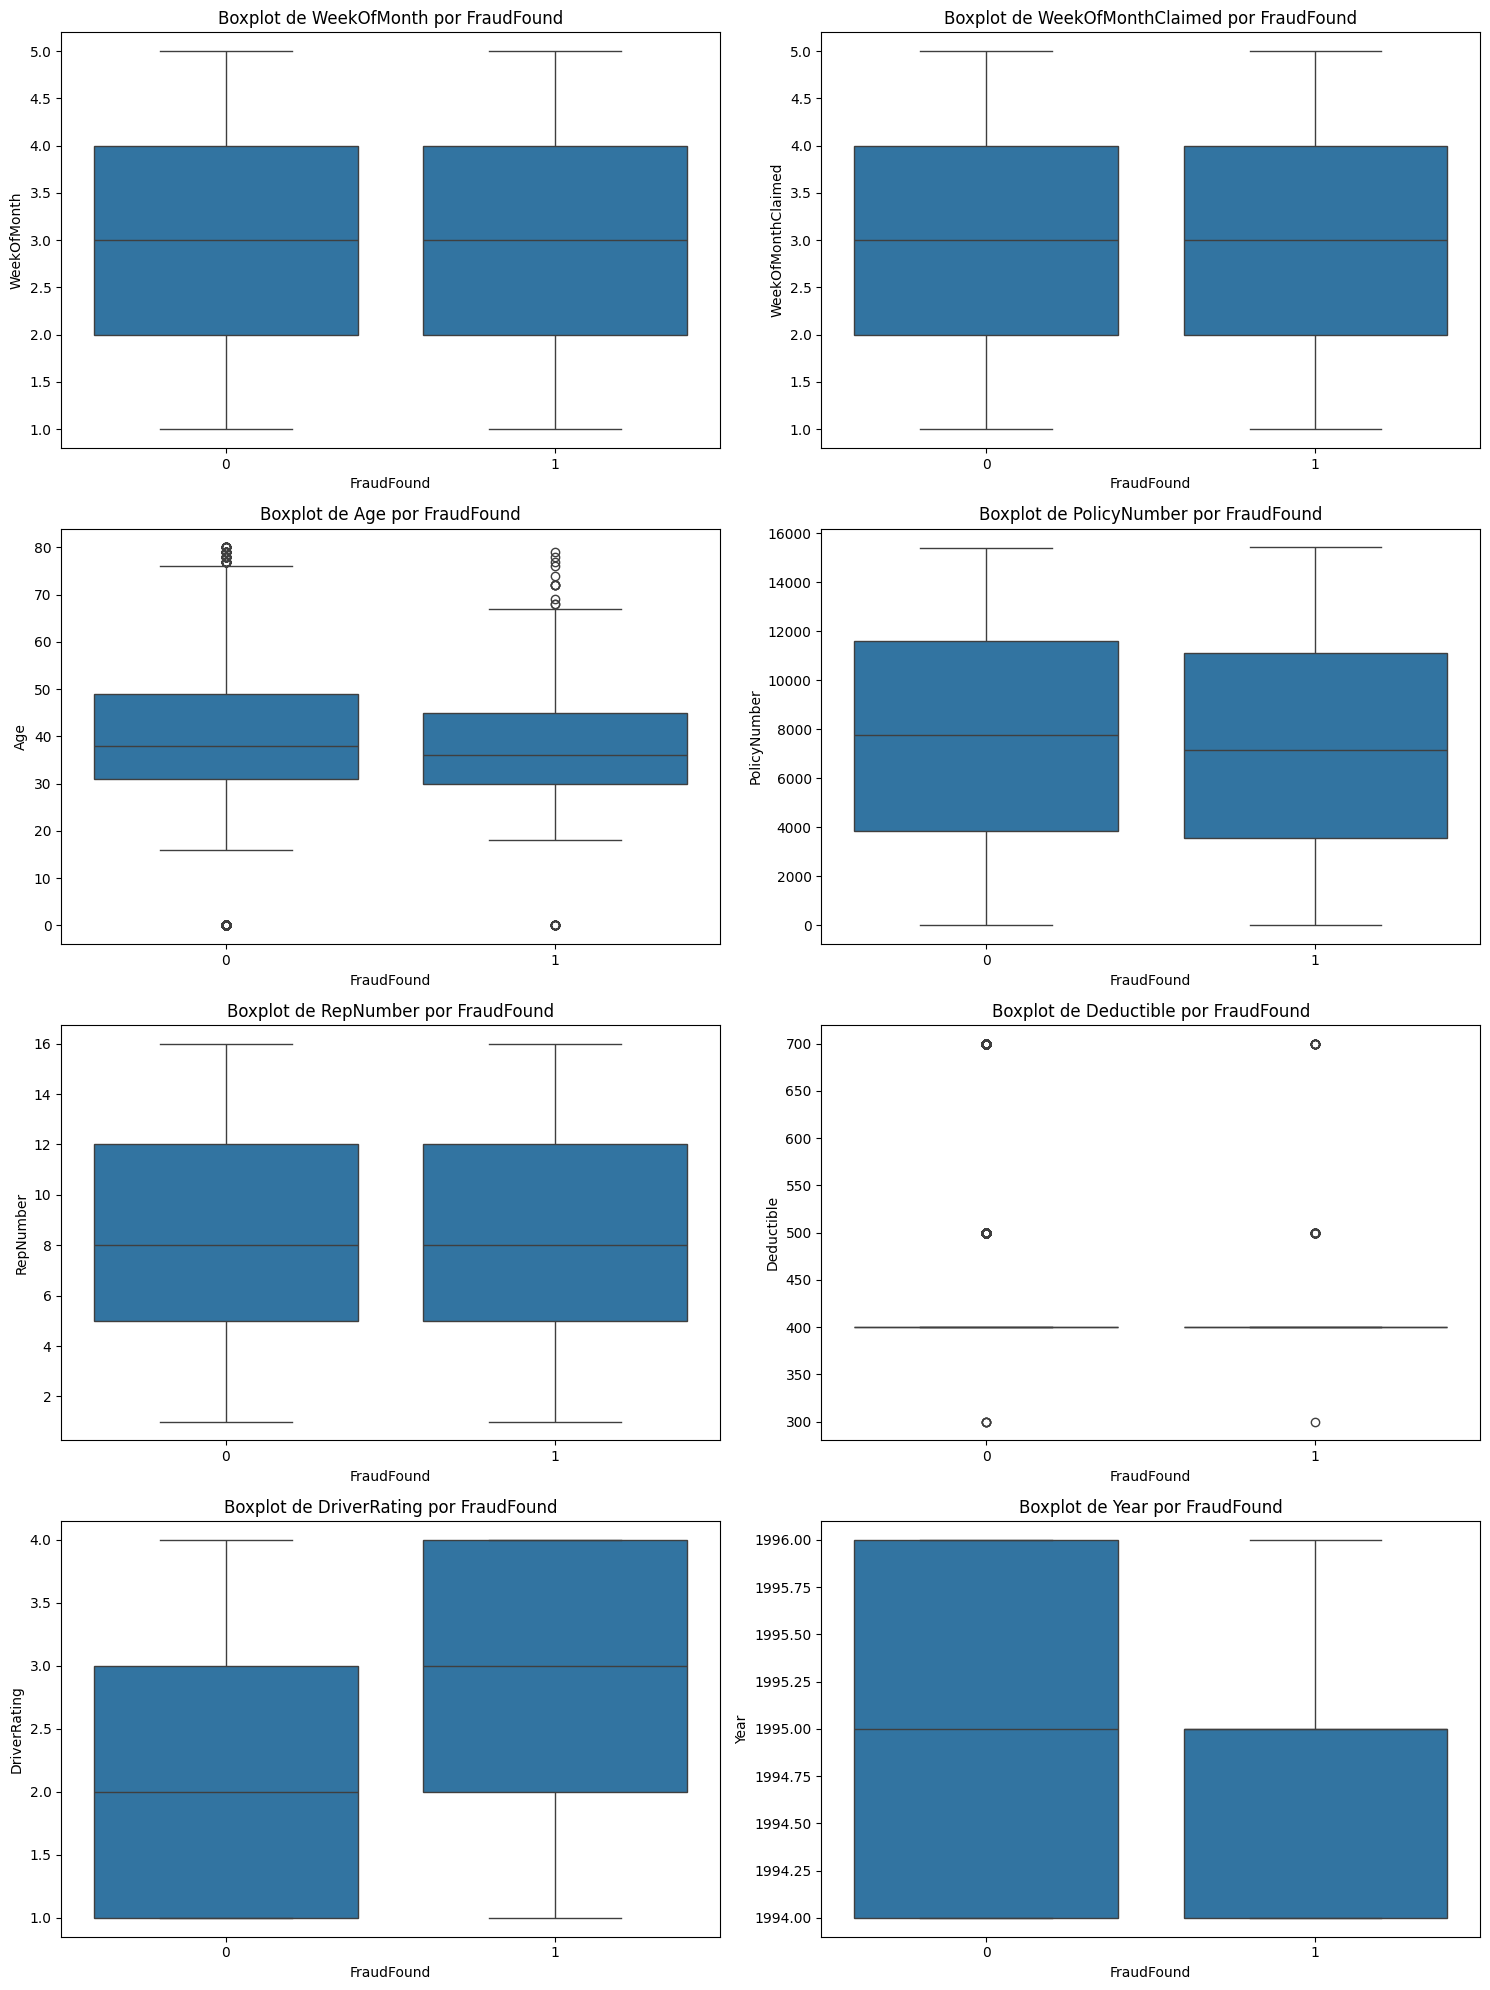

In [ ]:
# Lista de las variables numéricas
numeric_variables = ["WeekOfMonth", "WeekOfMonthClaimed", "Age", "PolicyNumber","RepNumber", "Deductible", "DriverRating", "Year"]

# Crear una figura con subgráficas en formato de doble columna
num_vars = len(numeric_variables)
cols = 2  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcula el número de filas necesarias

# Configurar la figura
plt.figure(figsize=(15, rows * 5))

# Crear un boxplot para cada variable numérica
for i, var in enumerate(numeric_variables):
    plt.subplot(rows, cols, i + 1)  # Crear subgráfica
    sns.boxplot(data=train_data, x="FraudFound", y=var)
    plt.title(f'Boxplot de {var} por FraudFound')  # Título del gráfico
    plt.ylabel(var)  # Etiqueta del eje y

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()



In [ ]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns

In [ ]:
categorical_columns = categorical_columns[1:]

In [ ]:
categorical_columns

Index(['DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'AgeBucket'],
      dtype='object')

In [ ]:
for column in categorical_columns:
    print(train_data[column].value_counts())
    print()

DayOfWeek
Monday       1836
Friday       1683
Tuesday      1569
Thursday     1532
Wednesday    1526
Saturday     1407
Sunday       1241
Name: count, dtype: int64

Make
Pontiac      2691
Toyota       2206
Honda        1951
Mazda        1659
Chevrolet    1162
Accura        329
Ford          296
VW            210
Dodge          78
Saab           72
Mercury        57
Saturn         38
Nisson         19
BMW            10
Jaguar          5
Porche          5
Mecedes         3
Ferrari         2
Lexus           1
Name: count, dtype: int64

AccidentArea
Urban    9685
Rural    1109
Name: count, dtype: int64

DayOfWeekClaimed
Monday       2631
Tuesday      2365
Wednesday    2038
Thursday     1892
Friday       1747
Saturday       88
Sunday         32
0               1
Name: count, dtype: int64

MonthClaimed
Jan    1011
May     986
Oct     944
Mar     924
Apr     913
Jun     905
Nov     901
Feb     895
Sep     870
Jul     854
Dec     799
Aug     791
0         1
Name: count, dtype: int64

Sex
Male   

## **Matriz de Correlación**

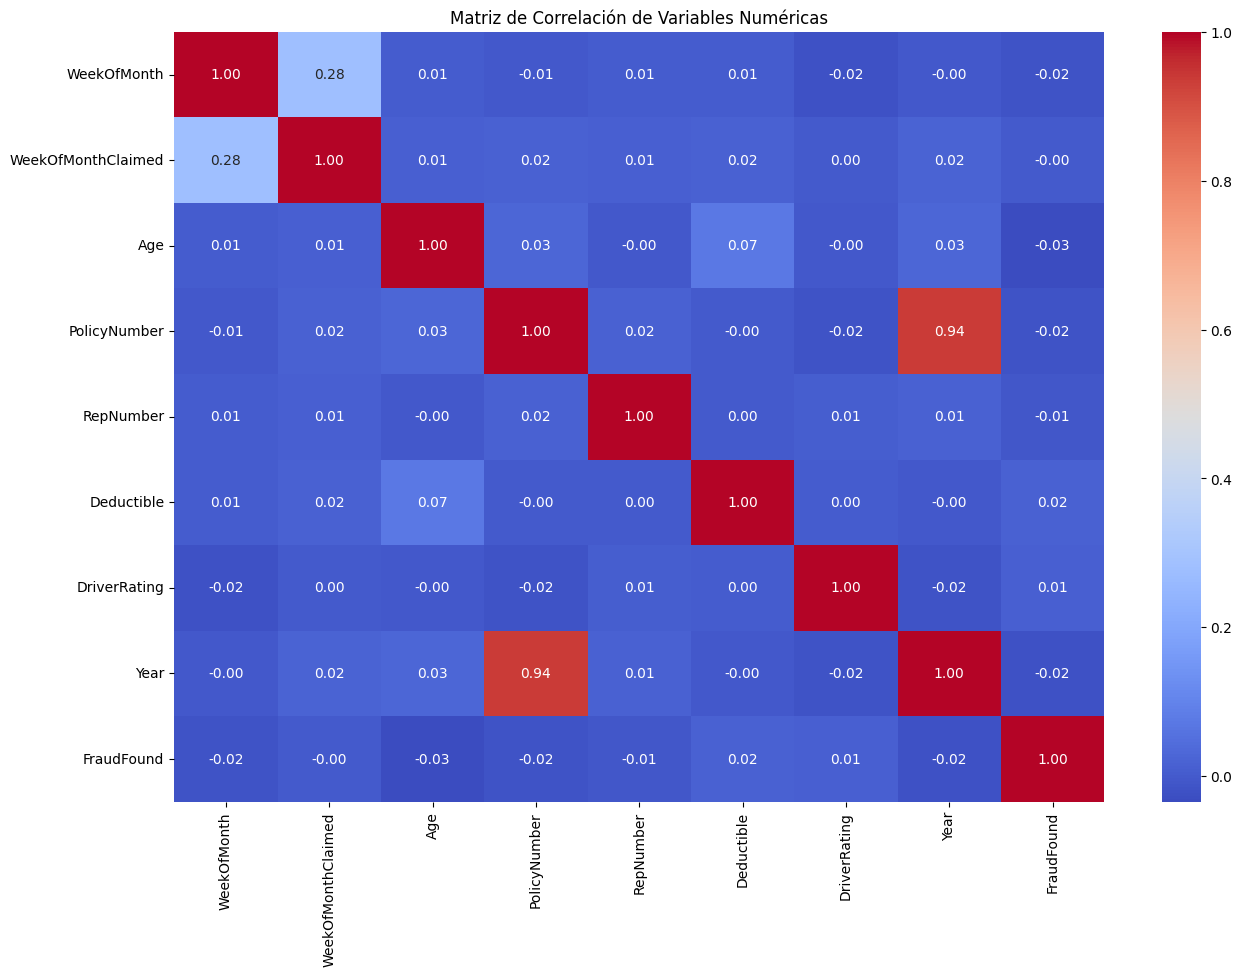

In [ ]:
correlation_matrix = train_data.select_dtypes(include=np.number).corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

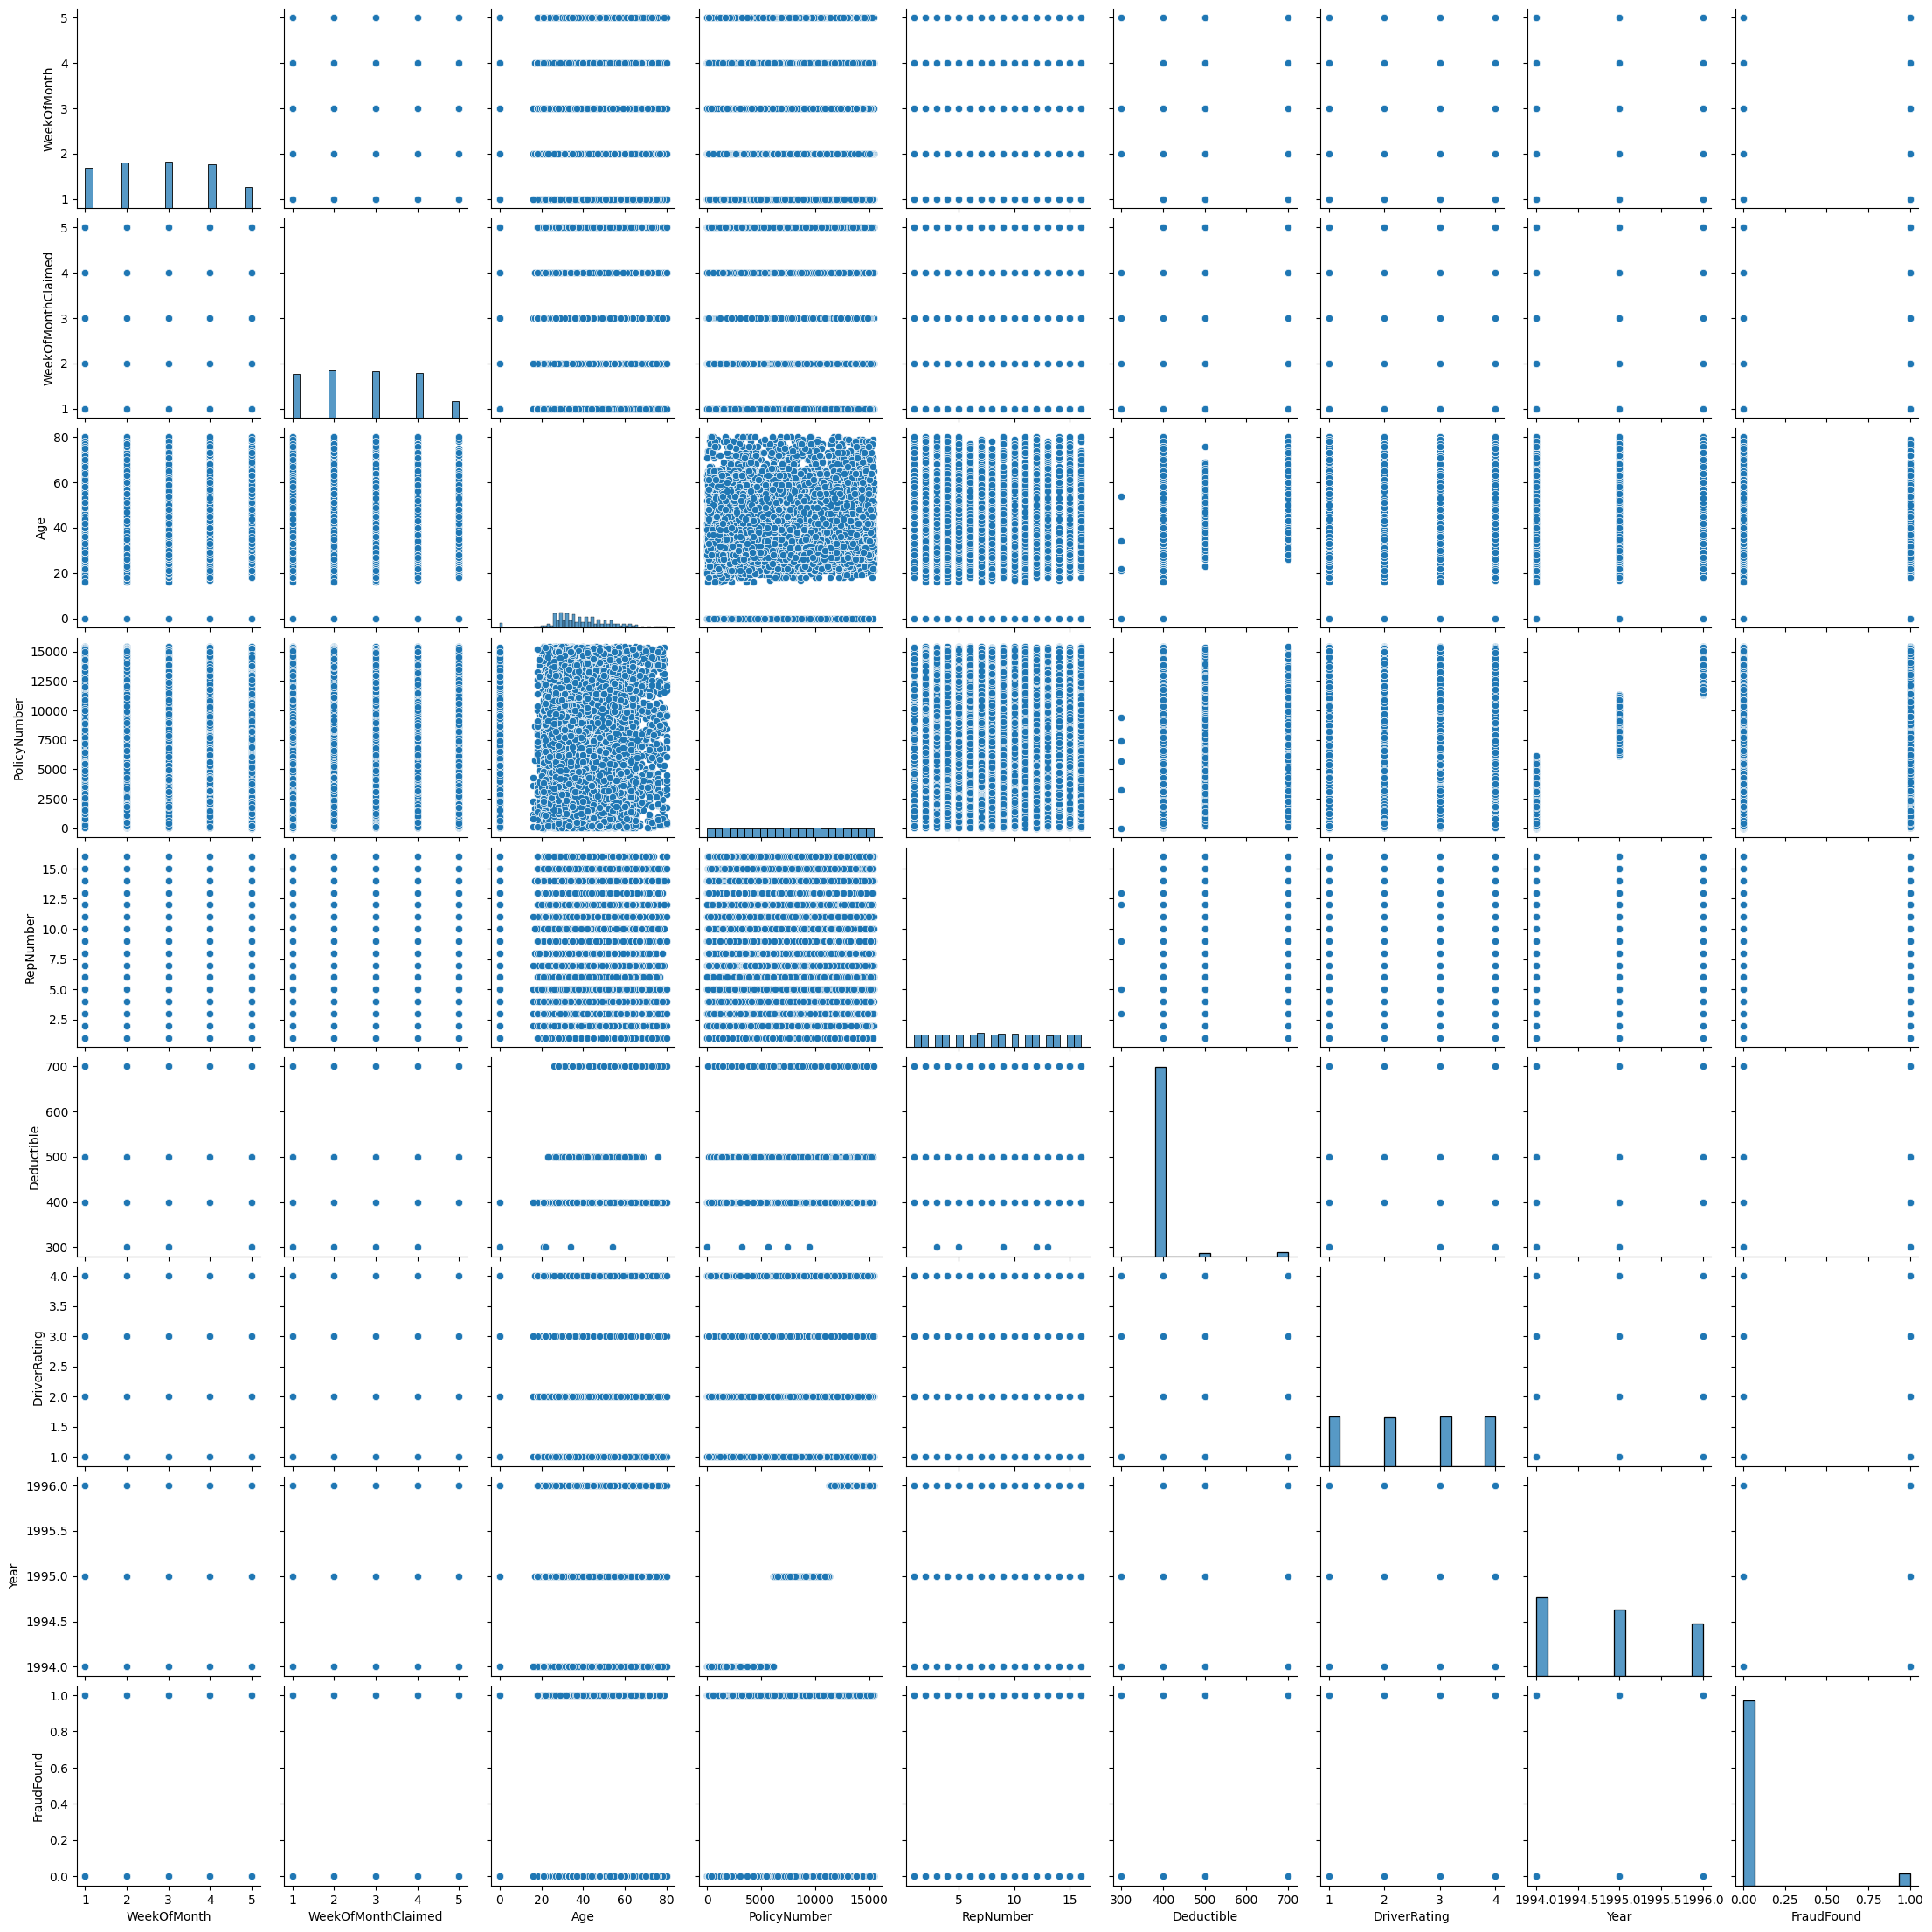

In [ ]:
# Gráfico de pares para variables numéricas
sns.pairplot(train_data.select_dtypes(include=np.number))
plt.show()

In [ ]:
train_data.head()

Month  WeekOfMonth DayOfWeek       Make AccidentArea DayOfWeekClaimed  \
6468    Aug            4  Saturday    Pontiac        Rural          Tuesday   
2151    Mar            2   Tuesday  Chevrolet        Urban          Tuesday   
14698   Nov            2    Sunday  Chevrolet        Urban          Tuesday   
11825   Jan            5  Saturday         VW        Urban           Monday   
13658   Dec            5    Friday     Accura        Urban        Wednesday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  \
6468           Aug                   5  Male       Married  ...   
2151           Mar                   3  Male       Married  ...   
14698          Nov                   4  Male       Married  ...   
11825          Feb                   1  Male       Married  ...   
13658          Jan                   1  Male       Married  ...   

       PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
6468                  No             No  External                none   
2151                  No             No  External                none   
14698                 No             No  External              1 to 2   
11825                 No             No  External              1 to 2   
13658                 No             No  External                none   

      AddressChange-Claim  NumberOfCars  Year  BasePolicy  FraudFound  \
6468         4 to 8 years    2 vehicles  1995   Collision           0   
2151            no change     1 vehicle  1994  All Perils           0   
14698           no change     1 vehicle  1996  All Perils           0   
11825           no change     1 vehicle  1996  All Perils           0   
13658           no change     1 vehicle  1996  All Perils           0   

      AgeBucket  
6468      21-30  
2151      41-50  
14698     41-50  
11825     71-80  
13658     51-60  

[5 rows x 34 columns]

## **Feature Engineering**

## **Recodificación de variables originales**

**Deductible** (> 400)

In [ ]:
train_data['Deductible'].value_counts(normalize=True).round(4)

Deductible
400    0.9629
700    0.0197
500    0.0169
300    0.0005
Name: proportion, dtype: float64

**Make_lujo:** Marcas de lujo: (Si o No)
'Accura','Saab','BMW', 'Porche', 'Jaguar', 'Mecedes'

In [ ]:
train_data['Make'].unique()

array(['Pontiac', 'Chevrolet', 'VW', 'Accura', 'Honda', 'Toyota', 'Dodge',
       'Mazda', 'Mercury', 'Ferrari', 'Ford', 'Saab', 'Saturn', 'Nisson',
       'Jaguar', 'BMW', 'Porche', 'Mecedes', 'Lexus'], dtype=object)

**MaritalStatus2:** Con o Sin pareja

In [ ]:
train_data['MaritalStatus'].value_counts(normalize=True).round(4)

MaritalStatus
Married     0.6886
Single      0.3042
Divorced    0.0049
Widow       0.0022
Name: proportion, dtype: float64

**AddressChange-Claim2 :**Indica si la dirección del titular de la póliza cambió después de presentar la reclamación. (Si o No)

In [ ]:
train_data['AddressChange-Claim'].value_counts(normalize=True).round(4)


AddressChange-Claim
no change         0.9295
4 to 8 years      0.0406
2 to 3 years      0.0182
1 year            0.0116
under 6 months    0.0002
Name: proportion, dtype: float64

* **Month:** 	El mes en que ocurrió el accidente.
* **MonthClaimed:** 	El mes en que se presentó la reclamación del seguro.\
Se hace esta recodificación por trimestres dado que al correr el modelo inicialmente, con los meses en el árbol salían valores <= 3.5

Se agrupó fin de semana si o no:
* **DayOfWeek** 	El día de la semana en que ocurrió el accidente.
* **DayOfWeekClaimed**	El día de la semana en que se presentó la reclamación del seguro.\
Se hace esta recodificación por fin de semana dado que al correr el modelo inicialmente, con los días en el árbol salían valores <= 5.5

**AgeOfVehicle** 	La antigüedad del vehículo asegurado.
Se agrupó en mayores a 5 años, si o no.

**Indicador de Tipo de Conductor** (DriverType): Clasificar a los conductores en función de su historial de reclamaciones. 'High Risk' if x < 3 else 'Low Risk'

In [ ]:
def create_features(train_data):
    # Crear la columna AgeBucket usando pd.cut
    train_data["AgeBucket"] = pd.cut(train_data["Age"],bins=[0, 20, 30, 40, 50, 60, 70, 80],labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"],right=True)

    # Se agrupará en deductible (> 400): Si o No
    train_data['Deducible_mayor400'] = np.where(train_data['Deductible'] > 400, 'Si', 'No')

    # Se agrupará Make_lujo: País de origen de la marca de vehículo
    def categorizar_marca(marca):
        if marca in ['Accura','Saab','BMW', 'Porche', 'Jaguar', 'Mecedes']:
            return 'Si'
        else:
            return 'No'

    train_data['Make_lujo'] = train_data['Make'].apply(categorizar_marca)

    # Define las listas de estados civiles para 'Sin Pareja'
    sin_pareja = ['Single', 'Divorced', 'Widow']
    # Crea una nueva columna basada en la lista anterior
    train_data['MaritalStatus2'] = train_data['MaritalStatus'].apply(lambda x: 'Sin Pareja' if x in sin_pareja else 'Con Pareja')

    # Agrupar AddressChange-Claim
    train_data['AddressChange-Claim2'] = np.where(train_data['AddressChange-Claim'] == 'no change', 'No', 'Si')

    # Agrupado por trimestre Month y MonthClaimed
    def asignar_trimestre(mes):
        if mes in ['Jan', 'Feb', 'Mar']:
            return 'T1'
        elif mes in ['Apr', 'May', 'Jun']:
            return 'T2'
        elif mes in ['Jul', 'Aug', 'Sep']:
            return 'T3'
        elif mes in ['Oct', 'Nov', 'Dec']:
            return 'T4'
        else:
            return 'Otro'  # O cualquier valor por defecto que desees

    train_data['Trimestre'] = train_data['Month'].apply(asignar_trimestre)
    train_data['Trim_Claimed'] = train_data['MonthClaimed'].apply(asignar_trimestre)

    # Convertir a string
    train_data['Trimestre'] = train_data['Trimestre'].astype(str)
    train_data['Trim_Claimed'] = train_data['Trim_Claimed'].astype(str)

    # Asignar weekend
    def asignar_weekend(dia):
        return 'Si' if dia in ['Saturday', 'Sunday'] else 'No'

    train_data['Weekend'] = train_data['DayOfWeek'].apply(asignar_weekend)
    train_data['Weekend_Claimed'] = train_data['DayOfWeekClaimed'].apply(asignar_weekend)

    # Asignar vehículo mayor a 5 años
    def asignar_vehiculo_mayor5(edad):
        return '0 - 5 años' if edad in ['new', '2 years', '3 years', '4 years', '5 years'] else 'Más de 5 años'

    train_data['Vehiculo_mayor5'] = train_data['AgeOfVehicle'].apply(asignar_vehiculo_mayor5)

    # Indicador de Tipo de Conductor (DriverType)
    train_data['DriverType'] = train_data['DriverRating'].apply(lambda x: 'High Risk' if x < 3 else 'Low Risk')

In [ ]:
create_features(train_data)
create_features(val_data)
create_features(test_data)

In [ ]:
x=['Make', 'MaritalStatus', 'AddressChange-Claim', 'Month', 'MonthClaimed', 'DayOfWeek','DayOfWeekClaimed', 'AgeOfVehicle', 'DriverRating']

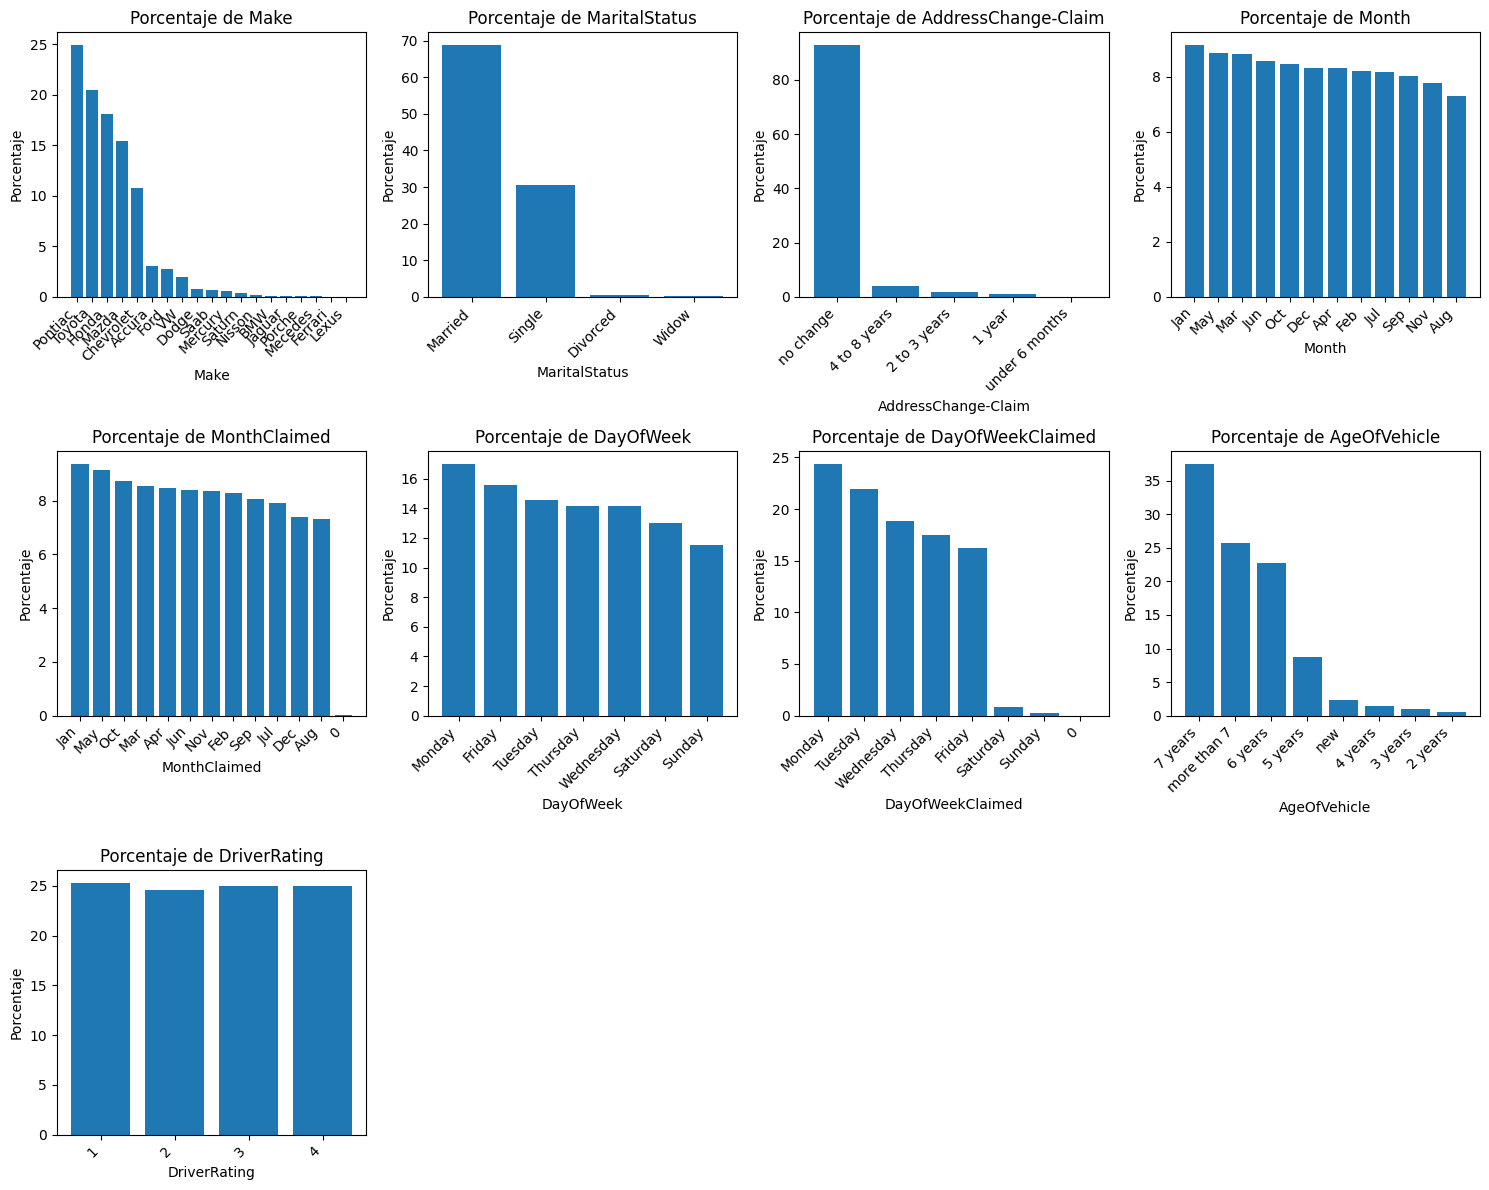

In [ ]:
# Definir el número de columnas para la cuadrícula
num_cols = 4

# Calcular el número de filas necesarias
num_rows = (len(x) + num_cols - 1) // num_cols

# Crear la figura y la cuadrícula
plt.figure(figsize=(15, num_rows * 4))

# Iterar sobre las variables en x
for i, var in enumerate(x):
    # Verificar si la columna existe en el DataFrame
    if var in train_data.columns:  # Agregar esta línea
        # Calcular el porcentaje para cada valor único de la variable
        percentages = train_data[var].value_counts(normalize=True) * 100

        # Crear la subgráfica en la cuadrícula
        plt.subplot(num_rows, num_cols, i + 1)

        # Crear el diagrama de barras
        plt.bar(percentages.index, percentages.values)

        # Configurar el título y etiquetas
        plt.title(f'Porcentaje de {var}')
        plt.xlabel(var)
        plt.ylabel('Porcentaje')

        # Rotar las etiquetas del eje x si es necesario
        plt.xticks(rotation=45, ha='right')
    else:
        print(f"La columna '{var}' no se encuentra en el DataFrame.")  # Agregar esta línea

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
x=['Make_lujo', 'MaritalStatus2', 'AddressChange-Claim2', 'Trimestre',
       'Trim_Claimed', 'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5',
       'DriverType']

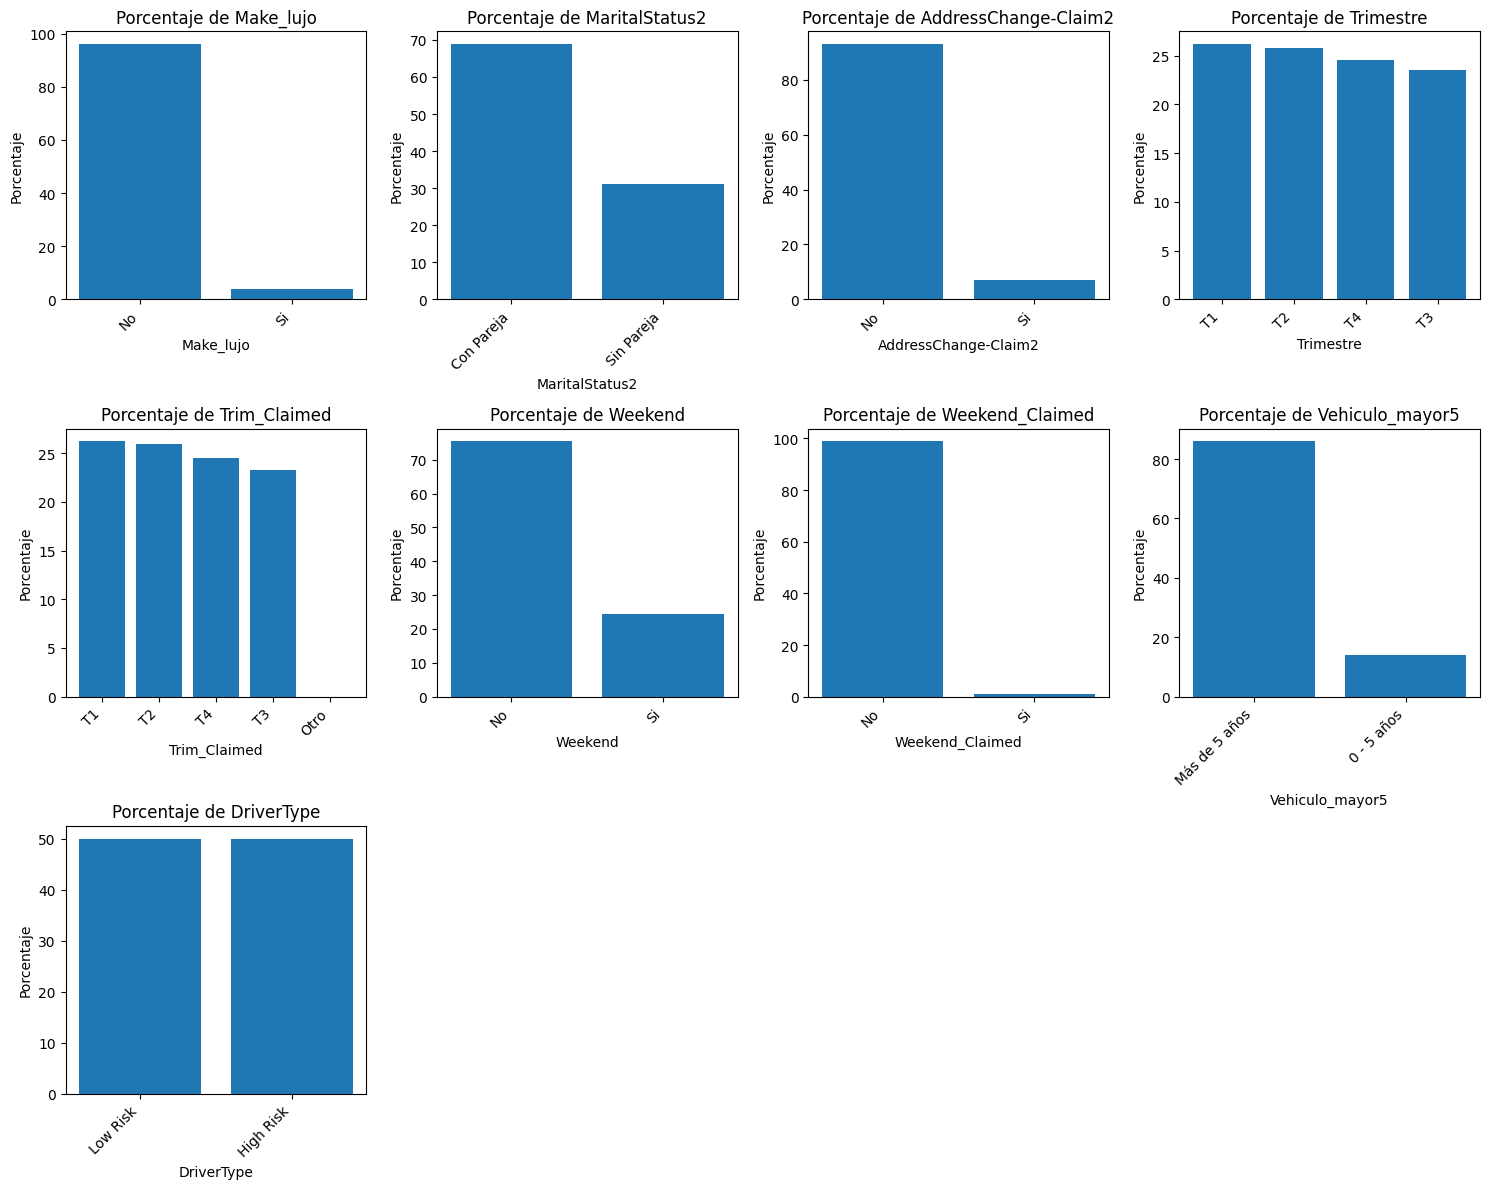

In [ ]:
# Definir el número de columnas para la cuadrícula
num_cols = 4

# Calcular el número de filas necesarias
num_rows = (len(x) + num_cols - 1) // num_cols

# Crear la figura y la cuadrícula
plt.figure(figsize=(15, num_rows * 4))

# Iterar sobre las variables en x
for i, var in enumerate(x):
    # Verificar si la columna existe en el DataFrame
    if var in train_data.columns:  # Agregar esta línea
        # Calcular el porcentaje para cada valor único de la variable
        percentages = train_data[var].value_counts(normalize=True) * 100

        # Crear la subgráfica en la cuadrícula
        plt.subplot(num_rows, num_cols, i + 1)

        # Crear el diagrama de barras
        plt.bar(percentages.index, percentages.values)

        # Configurar el título y etiquetas
        plt.title(f'Porcentaje de {var}')
        plt.xlabel(var)
        plt.ylabel('Porcentaje')

        # Rotar las etiquetas del eje x si es necesario
        plt.xticks(rotation=45, ha='right')
    else:
        print(f"La columna '{var}' no se encuentra en el DataFrame.")  # Agregar esta línea

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
train_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'AgeBucket', 'Deducible_mayor400',
       'Make_lujo', 'MaritalStatus2', 'AddressChange-Claim2', 'Trimestre',
       'Trim_Claimed', 'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5',
       'DriverType'],
      dtype='object')

In [ ]:
for column in train_data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  categorias = train_data[column].unique()
  print(categorias)


Variable: Month
['Aug' 'Mar' 'Nov' 'Jan' 'Dec' 'May' 'Oct' 'Jun' 'Feb' 'Apr' 'Jul' 'Sep']

Variable: DayOfWeek
['Saturday' 'Tuesday' 'Sunday' 'Friday' 'Monday' 'Thursday' 'Wednesday']

Variable: Make
['Pontiac' 'Chevrolet' 'VW' 'Accura' 'Honda' 'Toyota' 'Dodge' 'Mazda'
 'Mercury' 'Ferrari' 'Ford' 'Saab' 'Saturn' 'Nisson' 'Jaguar' 'BMW'
 'Porche' 'Mecedes' 'Lexus']

Variable: AccidentArea
['Rural' 'Urban']

Variable: DayOfWeekClaimed
['Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday'
 '0']

Variable: MonthClaimed
['Aug' 'Mar' 'Nov' 'Feb' 'Jan' 'May' 'Oct' 'Jun' 'Apr' 'Dec' 'Jul' 'Sep'
 '0']

Variable: Sex
['Male' 'Female']

Variable: MaritalStatus
['Married' 'Single' 'Divorced' 'Widow']

Variable: Fault
['Policy Holder' 'Third Party']

Variable: PolicyType
['Sedan - Collision' 'Sedan - All Perils' 'Utility - All Perils'
 'Sedan - Liability' 'Utility - Collision' 'Sport - Collision'
 'Utility - Liability' 'Sport - All Perils' 'Sport - Liability']

Variable: VehicleC

## **Unión de dos variables originales**

* **'PolicyType' y 'VehiclePrice'**\
Diferentes tipos de pólizas pueden asociarse con distintos niveles de riesgo. Por ejemplo, las pólizas de "todos los riesgos" suelen estar más expuestas a reclamos fraudulentos, especialmente en vehículos de alto precio.

* **'Days' y 'PastNumberOfClaims'**\
Un historial de múltiples reclamos puede indicar un mayor riesgo de fraude, particularmente si los reclamos se presentan en un corto período de tiempo.

* **'AgeOfPolicyHolder' y 'MaritalStatus2'**\
El estado civil puede influir en el comportamiento de conducción y en la frecuencia de presentación de reclamos. Por ejemplo, los conductores jóvenes y solteros tienden a presentar más reclamos.

* **'AccidentArea' y 'Fault'**\
Las áreas urbanas presentan diferentes patrones de accidentes en comparación con las rurales. Esto puede influir en la responsabilidad y en los tipos de fraude que se manifiestan.

* **'WitnessPresent' y 'PoliceReportFiled'**\
La presencia de testigos y la presentación de un informe policial pueden indicar la seriedad del reclamo. La falta de ambos elementos podría ser un indicativo de fraude.

* **'NumberOfCars' y 'Vehiculo_mayor5'**\
La cantidad de vehículos asegurados y su antigüedad pueden proporcionar información sobre la estrategia del asegurado. Un mayor número de vehículos antiguos podría estar asociado con intentos de fraude.

* **'BasePolicy' y 'VehicleCategory'**\
Diferentes categorías de vehículos pueden relacionarse con distintos tipos de pólizas, y ciertas combinaciones pueden revelar patrones de fraude.

* **'DayOfWeekClaimed' y 'Trim_Claimed'**\
Los patrones de fraude pueden variar según el día de la semana o el mes, posiblemente vinculados a comportamientos estacionales o eventos específicos.

* **'Make_lujo' y 'VehiclePrice'**\
Las marcas de vehículos pueden tener diferentes tasas de reclamos y riesgos asociados. Los vehículos más caros tienden a estar más expuestos a fraudes.

* **'AgentType' y 'NumberOfSuppliments'**\
La interacción con agentes, ya sean internos o externos, y la cantidad de suplementos pueden proporcionar información sobre la complejidad del caso, lo que podría aumentar el riesgo de fraude.

* **'Sex' y 'AgeOfPolicyHolder'**\
Las diferencias demográficas pueden influir en el comportamiento de reclamos. Por ejemplo, ciertos grupos pueden presentar más reclamos fraudulentos que otros.

* **'AccidentArea' y 'Days'**\
La ubicación del accidente y la duración de la póliza pueden estar relacionadas con el tipo de reclamación presentada. Las áreas rurales podrían tener menos denuncias, pero una mayor incidencia de fraude.

* **'AddressChange-Claim2' y 'NumberOfCars'**\
Un cambio de dirección reciente podría sugerir un intento de ocultar información, especialmente si se asocia con múltiples vehículos.

* **'PoliceReportFiled' y 'Days'**\
La presentación de un informe policial y la duración de la reclamación pueden estar correlacionadas, lo que indica si la reclamación es legítima o fraudulenta.

* **'Fault' y 'PolicyType'**\
La asignación de culpa y el tipo de póliza pueden ayudar a identificar patrones, donde ciertos tipos de pólizas podrían ser más susceptibles a fraudes según quién se considera responsable.

In [ ]:
# Crear nuevas combinaciones de variables
def create_comb_features(train_data):
    train_data['PolicyType-VehiclePrice'] = train_data['PolicyType'] + ' - ' + train_data['VehiclePrice']
    train_data['DaysPolicy-Claim-PastNumberOfClaims'] = train_data['Days:Policy-Claim'].astype(str) + ' - ' + train_data['PastNumberOfClaims'].astype(str)
    train_data['AgeOfPolicyHolder-MaritalStatus2'] = train_data['AgeOfPolicyHolder'].astype(str) + ' - ' + train_data['MaritalStatus2']
    train_data['AccidentArea-Fault'] = train_data['AccidentArea'] + ' - ' + train_data['Fault']
    train_data['WitnessPresent-PoliceReportFiled'] = train_data['WitnessPresent'] + ' - ' + train_data['PoliceReportFiled']
    train_data['NumberOfCars-Vehiculo_mayor5'] = train_data['NumberOfCars'].astype(str) + ' - ' + train_data['Vehiculo_mayor5'].astype(str)
    train_data['BasePolicy-VehicleCategory'] = train_data['BasePolicy'] + ' - ' + train_data['VehicleCategory']
    train_data['Weekend_Claimed-Trim_Claimed'] = train_data['Weekend_Claimed'] + ' - ' + train_data['Trim_Claimed']
    train_data['Make_lujo-VehiclePrice'] = train_data['Make_lujo'] + ' - ' + train_data['VehiclePrice']
    train_data['AgentType-NumberOfSuppliments'] = train_data['AgentType'] + ' - ' + train_data['NumberOfSuppliments']
    train_data['Sex-AgeOfPolicyHolder'] = train_data['Sex'] + ' - ' + train_data['AgeOfPolicyHolder'].astype(str)
    train_data['AccidentArea-DaysPolicy-Accident'] = train_data['AccidentArea'] + ' - ' + train_data['Days:Policy-Accident'].astype(str)
    train_data['AddressChange-Claim2-NumberOfCars'] = train_data['AddressChange-Claim2'] + ' - ' + train_data['NumberOfCars'].astype(str)
    train_data['PoliceReportFiled-DaysPolicy-Claim'] = train_data['PoliceReportFiled'] + ' - ' + train_data['Days:Policy-Claim'].astype(str)
    train_data['Fault-PolicyType'] = train_data['Fault'] + ' - ' + train_data['PolicyType']
    train_data['Make_lujo-VehiclePrice'] = train_data['Make_lujo'] + ' - ' + train_data['VehiclePrice']
    train_data['AgeBucket-MaritalStatus2'] = train_data['AgeBucket'].astype(str) + ' - ' + train_data['MaritalStatus2']


In [ ]:
create_comb_features(train_data)
create_comb_features(val_data)
create_comb_features(test_data)

In [ ]:
train_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'AgeBucket', 'Deducible_mayor400',
       'Make_lujo', 'MaritalStatus2', 'AddressChange-Claim2', 'Trimestre',
       'Trim_Claimed', 'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5',
       'DriverType', 'PolicyType-VehiclePrice',
       'DaysPolicy-Claim-PastNumberOfClaims',
       'AgeOfPolicyHolder-MaritalStatus2', 'AccidentArea-Fault',
       'WitnessPresent-PoliceReportFiled', 'NumberOfCars-Vehiculo_mayor5',


# Encoding

In [ ]:
#Librerías variables categóricas
!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


In [ ]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns

In [ ]:
categorical_columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'AgeBucket', 'Deducible_mayor400', 'Make_lujo',
       'MaritalStatus2', 'AddressChange-Claim2', 'Trimestre', 'Trim_Claimed',
       'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5', 'DriverType',
       'PolicyType-VehiclePrice', 'DaysPolicy-Claim-PastNumberOfClaims',
       'AgeOfPolicyHolder-MaritalStatus2', 'AccidentArea-Fault',
       'WitnessPresent-PoliceReportFiled', 'NumberOfCars-Vehiculo_mayor5',
       'BasePolicy-VehicleCategory', 'Weekend_Claimed-Trim_Claimed',
       'Make_lujo-VehiclePrice', 'AgentType-NumberOfSuppliments',
       'Sex

In [ ]:
from category_encoders.target_encoder import TargetEncoder

In [ ]:
# Variables categóricas que serán codificadas con one-hot encoding
#onehot_cols = ['VehicleCategory']

In [ ]:
# Variables ordinales que serán codificadas con un ordinal encoder
ordinal_cols = ['AccidentArea','Sex', 'Fault', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
    'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'NumberOfCars',
    'DriverType', 'Deducible_mayor400', 'MaritalStatus2', 'AddressChange-Claim2',
    'Trimestre', 'Trim_Claimed', 'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5','AgeBucket','Make_lujo']

In [ ]:
# Variables combinadas o derivadas que necesitan ser procesadas o creadas
target_cols = ['PolicyType', 'PolicyType-VehiclePrice',
       'DaysPolicy-Claim-PastNumberOfClaims',
       'AgeOfPolicyHolder-MaritalStatus2', 'AccidentArea-Fault',
       'WitnessPresent-PoliceReportFiled', 'NumberOfCars-Vehiculo_mayor5',
       'BasePolicy-VehicleCategory', 'Weekend_Claimed-Trim_Claimed',
       'Make_lujo-VehiclePrice', 'AgentType-NumberOfSuppliments',
       'Sex-AgeOfPolicyHolder', 'AccidentArea-DaysPolicy-Accident',
       'AddressChange-Claim2-NumberOfCars',
       'PoliceReportFiled-DaysPolicy-Claim', 'Fault-PolicyType',
       'AgeBucket-MaritalStatus2']

In [ ]:
ordinal_encoder = OrdinalEncoder(
    cols=ordinal_cols,
    mapping=[
        {"col": "AccidentArea", "mapping": {'Urban': 0, 'Rural': 1}},
        {"col": "BasePolicy", "mapping": {'Liability': 0, 'Collision': 0.5,'All Perils': 1}},
        {"col": "AgeOfVehicle", "mapping": {'5 years':5,'new':0,'7 years':7,'6 years':6,'more than 7':10,'3 years':3,'4 years':4,'2 years':2}},
        {"col": "VehicleCategory", "mapping": {'Sedan': 0.5, 'Sport': 1, 'Utility': 0.75}},
        {"col": "Sex", "mapping": {'Male': 1, 'Female': 0}},
        {"col": "Fault", "mapping": {'Policy Holder': 1, 'Third Party': 0}},
        {"col": "VehiclePrice", "mapping": {'less than 20,000': 15000, '20,000 to 29,000': 25000, '30,000 to 39,000': 35000, '40,000 to 59,000': 50000, '60,000 to 69,000': 65000, 'more than 69,000': 75000}},
        {"col": "Days:Policy-Accident", "mapping": {'none': 0, '1 to 7': 4, '8 to 15': 12, '15 to 30': 23, 'more than 30': 40}},
        {"col": "Days:Policy-Claim", "mapping": {'8 to 15': 12, '15 to 30': 23, 'more than 30': 40}},
        {"col": "PastNumberOfClaims", "mapping": {'none': 0, '1': 1, '2 to 4': 3, 'more than 4': 5}},
        {"col": "AgeOfPolicyHolder", "mapping": {'16 to 17': 15, '18 to 20': 19, '21 to 25': 23, '26 to 30': 28, '31 to 35': 33, '36 to 40': 38, '41 to 50': 45, '51 to 65': 60, 'over 65': 70}},
        {"col": "PoliceReportFiled", "mapping": {'Yes': 1, 'No': 0}},
        {"col": "WitnessPresent", "mapping": {'Yes': 1, 'No': 0}},
        {"col": "AgentType", "mapping": {'Internal': 1, 'External': 0}},
        {"col": "NumberOfSuppliments", "mapping": {'none': 0, '1 to 2': 1, '3 to 5': 4, 'more than 5': 6}},
        {"col": "NumberOfCars", "mapping": {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3.5, '5 to 8': 6.5, 'more than 8': 9}},
        {"col": "DriverType", "mapping": {'Low Risk': 0, 'High Risk': 1}},
        {"col": "Deducible_mayor400", "mapping": {'No': 0, 'Si': 1}},
        {"col": "Make_lujo", "mapping": {'No': 0, 'Si': 1}},
        {"col": "MaritalStatus2", "mapping": {'Sin Pareja': 0, 'Con Pareja': 1}},
        {"col": "AddressChange-Claim2", "mapping": {'No': 0, 'Si': 1}},
        {"col": "Trimestre", "mapping": {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}},
        {"col": "Trim_Claimed", "mapping": {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}},
        {"col": "Weekend", "mapping": {'Si': 1, 'No': 0}},
        {"col": "Weekend_Claimed", "mapping": {'Si': 1, 'No': 0}},
        {"col": "Vehiculo_mayor5", "mapping": {'0 - 5 años': 0, 'Más de 5 años': 1}},
        {"col": "AgeBucket", "mapping": {"0-20":10, "21-30":25, "31-40":35, "41-50":45, "51-60":55, "61-70":65, "71-80":75}}
    ]
)


In [ ]:
#onehot_encoder = OneHotEncoder(cols=onehot_cols, use_cat_names=True)
target_encoder = TargetEncoder(cols=target_cols)

In [ ]:
ordinal_encoder = ordinal_encoder.fit(X=train_data)
#onehot_encoder = onehot_encoder.fit(X=train_data)
target_encoder = target_encoder.fit(X=train_data, y=train_data["FraudFound"])

### Train data encoding

In [ ]:
enconded_train_data = ordinal_encoder.transform(X=train_data)
enconded_train_data = target_encoder.transform(X=enconded_train_data)
#enconded_train_data = onehot_encoder.transform(X=enconded_train_data)

In [ ]:
enconded_train_data

Month  WeekOfMonth DayOfWeek       Make  AccidentArea DayOfWeekClaimed  \
6468    Aug            4  Saturday    Pontiac             1          Tuesday   
2151    Mar            2   Tuesday  Chevrolet             0          Tuesday   
14698   Nov            2    Sunday  Chevrolet             0          Tuesday   
11825   Jan            5  Saturday         VW             0           Monday   
13658   Dec            5    Friday     Accura             0        Wednesday   
...     ...          ...       ...        ...           ...              ...   
407     Nov            3  Thursday    Pontiac             0           Monday   
1720    May            5    Sunday      Honda             0           Monday   
15068   Sep            2   Tuesday       Ford             0         Saturday   
1796    Feb            2   Tuesday         VW             0        Wednesday   
13838   Feb            3    Sunday    Pontiac             0           Friday   

      MonthClaimed  WeekOfMonthClaimed  Sex MaritalStatus  ...  \
6468           Aug                   5    1       Married  ...   
2151           Mar                   3    1       Married  ...   
14698          Nov                   4    1       Married  ...   
11825          Feb                   1    1       Married  ...   
13658          Jan                   1    1       Married  ...   
...            ...                 ...  ...           ...  ...   
407            Nov                   5    1       Married  ...   
1720           May                   5    1       Married  ...   
15068          Oct                   1    1       Married  ...   
1796           Feb                   2    0       Married  ...   
13838          Feb                   4    1       Married  ...   

       BasePolicy-VehicleCategory  Weekend_Claimed-Trim_Claimed  \
6468                     0.065022                      0.065191   
2151                     0.103878                      0.066500   
14698                    0.103878                      0.040629   
11825                    0.103878                      0.066500   
13658                    0.143498                      0.066500   
...                           ...                           ...   
407                      0.065022                      0.040629   
1720                     0.065022                      0.064702   
15068                    0.007163                      0.151057   
1796                     0.065022                      0.066500   
13838                    0.065022                      0.066500   

       Make_lujo-VehiclePrice  AgentType-NumberOfSuppliments  \
6468                 0.046053                       0.064695   
2151                 0.051081                       0.064695   
14698                0.046053                       0.068485   
11825                0.065789                       0.068485   
13658                0.195117                       0.064695   
...                       ...                            ...   
407                  0.051081                       0.064695   
1720                 0.046053                       0.068485   
15068                0.037771                       0.064695   
1796                 0.046053                       0.064695   
13838                0.051081                       0.068485   

       Sex-AgeOfPolicyHolder  AccidentArea-DaysPolicy-Accident  \
6468                0.070305                          0.081130   
2151                0.067220                          0.056815   
14698               0.046072                          0.056815   
11825               0.043887                          0.056815   
13658               0.046072                          0.056815   
...                      ...                               ...   
407                 0.070305                          0.056815   
1720                0.046072                          0.056815   
15068               0.043887                          0.056815   
1796              

In [ ]:
enconded_train_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'AgeBucket', 'Deducible_mayor400',
       'Make_lujo', 'MaritalStatus2', 'AddressChange-Claim2', 'Trimestre',
       'Trim_Claimed', 'Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5',
       'DriverType', 'PolicyType-VehiclePrice',
       'DaysPolicy-Claim-PastNumberOfClaims',
       'AgeOfPolicyHolder-MaritalStatus2', 'AccidentArea-Fault',
       'WitnessPresent-PoliceReportFiled', 'NumberOfCars-Vehiculo_mayor5',


### Test data encoding

In [ ]:
enconded_val_data = ordinal_encoder.transform(X=val_data)
enconded_val_data = target_encoder.transform(X=enconded_val_data)
#enconded_val_data = onehot_encoder.transform(X=enconded_val_data)

In [ ]:
enconded_test_data = ordinal_encoder.transform(X=test_data)
enconded_test_data = target_encoder.transform(X=enconded_test_data)
#enconded_test_data = onehot_encoder.transform(X=enconded_test_data)

#**Fórmula para el Cobro del Seguro**

In [ ]:
def calcular_valor_seguro(dataframe):  # Changed dataframes to dataframe
    C_base = dataframe['VehiclePrice'].mean()

     # Before applying the function, ensure relevant columns are numeric
    for col in ['VehiclePrice', 'DriverRating', 'Age', 'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle', 'AccidentArea', 'WitnessPresent', 'PoliceReportFiled', 'Fault']:
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN


    def calcular_valor(row):
        # Pesos de las variables
        alpha = 0.02  # VehiclePrice
        beta = 0.10   # DriverRating
        gamma = 0.01  # Age
        delta = 0.001 # Deductible (se restará)
        theta = 0.05  # PastNumberOfClaims
        epsilon = 0.02 # AgeOfVehicle
        zeta = 0.03   # AccidentArea (0 = Urban, 1 = Rural)
        eta = 0.05    # WitnessPresent
        lambda_ = 0.04 # PoliceReportFiled
        mu = 0.03     # Fault (0 = Third Party, 1 = Policy Holder)

        # Fórmula del valor del seguro
        valor_seguro = (
            C_base + alpha * row['VehiclePrice'] + beta * row['DriverRating']
            + gamma * row['Age']+ theta * row['PastNumberOfClaims'] + epsilon * row['AgeOfVehicle'] + zeta * row['AccidentArea'] + eta * row['WitnessPresent'] + lambda_ * row['PoliceReportFiled'] + mu * row['Fault']
            - delta * row['Deductible']  # Restar el deducible

        )
        return valor_seguro # Added return statement

    # Apply the calcular_valor function to each row of the dataframe
    dataframe['ValorSeguro'] = dataframe.apply(calcular_valor, axis=1)

    return dataframe # Added return statement to return modified dataframe


# Call the function with your dataframes
enconded_train_data = calcular_valor_seguro(enconded_train_data)
enconded_val_data = calcular_valor_seguro(enconded_val_data)
enconded_test_data = calcular_valor_seguro(enconded_test_data)

count    10794.00
mean     35183.14
std        354.27
min      34792.71
25%      34993.18
50%      34993.46
75%      35193.40
max      35993.95
Name: ValorSeguro, dtype: float64


<Axes: ylabel='ValorSeguro'>

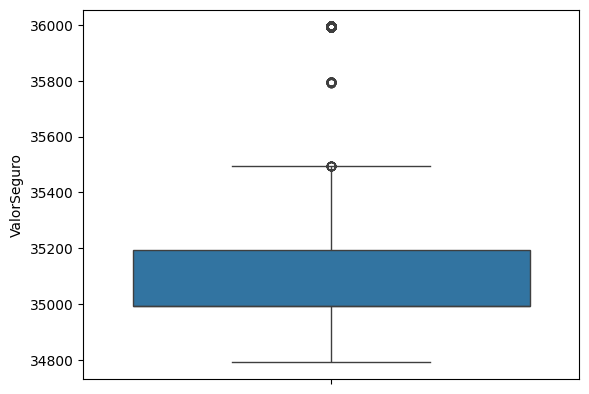

In [ ]:
print(enconded_train_data['ValorSeguro'].describe().round(2))
sns.boxplot(data=enconded_train_data, y='ValorSeguro')

<Axes: xlabel='FraudFound', ylabel='ValorSeguro'>

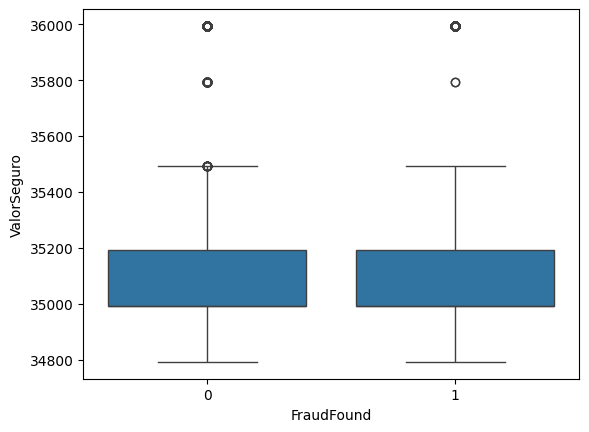

In [ ]:
sns.boxplot(data=enconded_train_data, y='ValorSeguro',x='FraudFound')

##**Fraud Risk Score**

In [ ]:
# Función para calcular el Fraud Risk Score
def calculate_fraud_risk_score(data):
    # Asignamos pesos a las variables clave
    alpha_claims = 1.5
    alpha_days_policy_accident = -0.005  # Inversamente proporcional
    alpha_vehicle_price = 0.0002
    alpha_number_of_cars = 0.8

    # Calculamos el Fraud Risk Score
    data['FraudRiskScore'] = (
        alpha_claims * data['PastNumberOfClaims'] +
        alpha_days_policy_accident * data['Days:Policy-Accident'] +
        alpha_vehicle_price * data['VehiclePrice'] +
        alpha_number_of_cars * data['NumberOfCars']
    )

    return data

# Call the function with your dataframes
enconded_train_data = calculate_fraud_risk_score(enconded_train_data)
enconded_val_data = calculate_fraud_risk_score(enconded_val_data)
enconded_test_data = calculate_fraud_risk_score(enconded_test_data)

count    10794.00
mean        10.51
std          4.45
min          3.60
25%          7.10
50%         10.10
75%         13.10
max         24.70
Name: FraudRiskScore, dtype: float64


<Axes: ylabel='FraudRiskScore'>

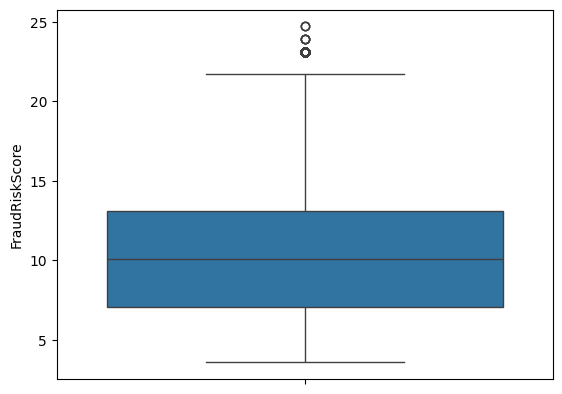

In [ ]:
print(enconded_train_data['FraudRiskScore'].describe().round(2))
sns.boxplot(data=enconded_train_data, y='FraudRiskScore')

<Axes: xlabel='FraudFound', ylabel='FraudRiskScore'>

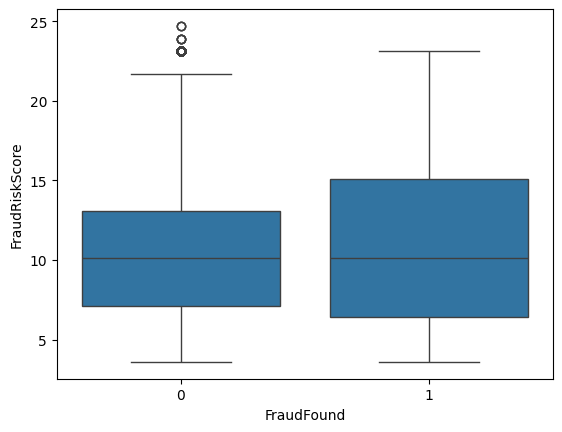

In [ ]:
sns.boxplot(data=enconded_train_data, y='FraudRiskScore',x='FraudFound')

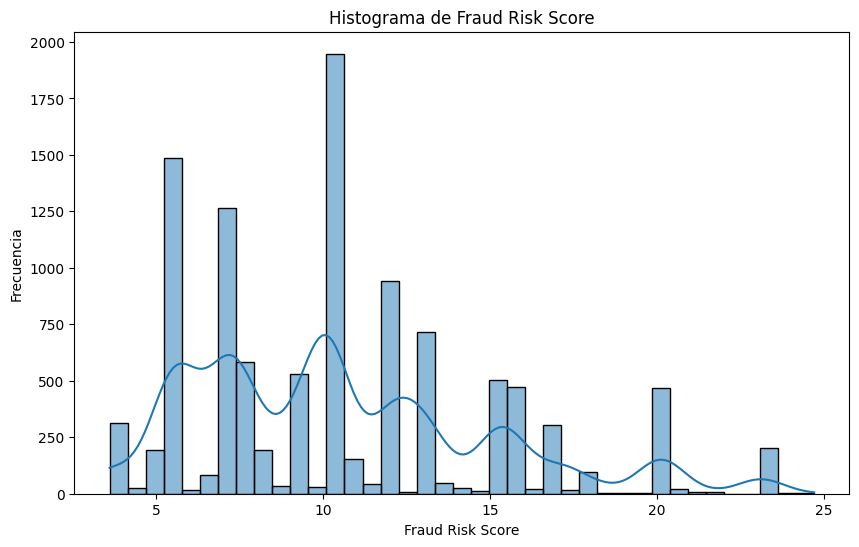

In [ ]:
# prompt: historgram de enconded_train_data['FraudRiskScore']
plt.figure(figsize=(10, 6))
sns.histplot(enconded_train_data['FraudRiskScore'], kde=True)
plt.title('Histograma de Fraud Risk Score')
plt.xlabel('Fraud Risk Score')
plt.ylabel('Frecuencia')
plt.show()

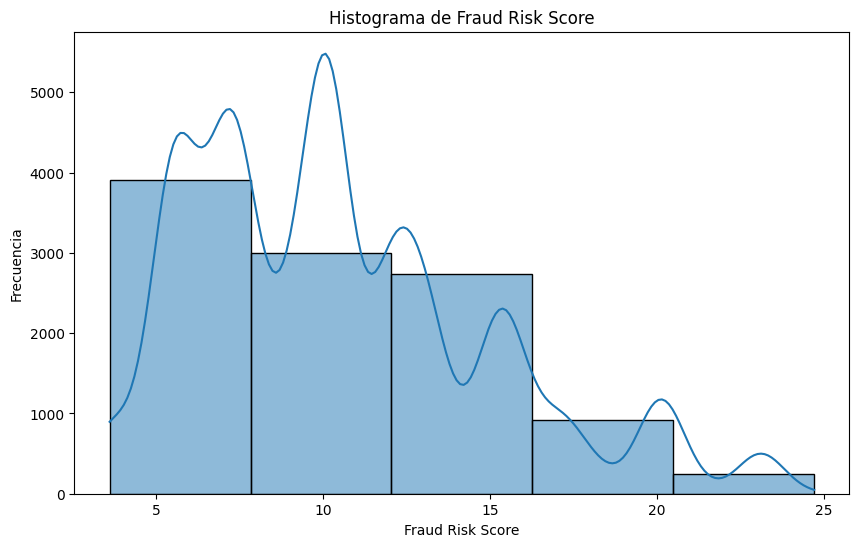

In [ ]:
# prompt: historgram de enconded_train_data['FraudRiskScore']
plt.figure(figsize=(10, 6))
sns.histplot(enconded_train_data['FraudRiskScore'], kde=True, bins=5)
plt.title('Histograma de Fraud Risk Score')
plt.xlabel('Fraud Risk Score')
plt.ylabel('Frecuencia')
plt.show()

# Training

In [ ]:
#Librerías para modelos de machine learning
#!pip install scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import xgboost as xgb

In [ ]:
###### re sampling... para dat set de entrenamiento (todas las columnas)

In [ ]:
features = ['AccidentArea','Sex','Fault',  'VehiclePrice','Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
'AgeOfPolicyHolder', 'PoliceReportFiled','WitnessPresent', 'AgentType', 'NumberOfSuppliments','NumberOfCars','AgeBucket', 'Deducible_mayor400', 'Make_lujo','MaritalStatus2', 'AddressChange-Claim2', 'Trimestre', 'Trim_Claimed','Weekend', 'Weekend_Claimed', 'Vehiculo_mayor5', 'DriverType',

'VehicleCategory','BasePolicy',

'Age', 'Year', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Deductible', 'DriverRating','RepNumber','ValorSeguro',

'PolicyType','PolicyType-VehiclePrice', 'DaysPolicy-Claim-PastNumberOfClaims',
       'AgeOfPolicyHolder-MaritalStatus2', 'AccidentArea-Fault',
       'WitnessPresent-PoliceReportFiled', 'NumberOfCars-Vehiculo_mayor5',
       'BasePolicy-VehicleCategory', 'Weekend_Claimed-Trim_Claimed',
       'Make_lujo-VehiclePrice', 'AgentType-NumberOfSuppliments',
       'Sex-AgeOfPolicyHolder', 'AccidentArea-DaysPolicy-Accident',
       'AddressChange-Claim2-NumberOfCars',
       'PoliceReportFiled-DaysPolicy-Claim', 'Fault-PolicyType',
       'AgeBucket-MaritalStatus2','FraudRiskScore'
]

## Baseline model

In [ ]:
baseline_model = xgb.XGBClassifier(random_state=1)

In [ ]:
baseline_model.fit(X=enconded_train_data[features], y=enconded_train_data["FraudFound"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
pred_train = baseline_model.predict(enconded_train_data[features])
pred_val = baseline_model.predict(enconded_val_data[features])

In [ ]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["FraudFound"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10149
           1       1.00      0.83      0.91       645

    accuracy                           0.99     10794
   macro avg       0.99      0.91      0.95     10794
weighted avg       0.99      0.99      0.99     10794



In [ ]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["FraudFound"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.43      0.02      0.04       139

    accuracy                           0.94      2313
   macro avg       0.68      0.51      0.50      2313
weighted avg       0.91      0.94      0.91      2313



Esto quiere decir que la data está desbalanceada. Está clasificando muy mal a los malos. Hay overfill

In [ ]:
enconded_train_data["FraudFound"].value_counts()

FraudFound
0    10149
1      645
Name: count, dtype: int64

In [ ]:
scale_pos_weight = round(10149/645, 2) #clase negariva  / clase positiva

In [ ]:
scale_pos_weight

15.73

## Hyperparameter tuning

In [ ]:
#!pip uninstall -y numpy pandas scikit-learn xgboost
#!pip install numpy pandas scikit-learn xgboost

In [174]:
params_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [3, 10, 50, 100],
    "subsample": [0.3, 0.6, 0.9],
    "colsample_bytree": [0.3, 0.6, 0.9],
    "colsample_bynode": [0.3, 0.6, 0.9]
}

tuner = GridSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=1),
    param_grid=params_grid,
    scoring="recall",#Mi prioridad en este caso son los malos.
    return_train_score=True,
    n_jobs=-1,
    verbose=2
)

In [ ]:
tuner.fit(X=enconded_train_data[features], y=enconded_train_data["FraudFound"])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.3, 0.6, 0.9],
                         'colsample_bytree': [0.3, 0.6, 0.9],
                         'max_depth': [3, 10, 50, 100],
                         'n_estimators': [20, 50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=2)

In [ ]:
tuner_best_model = tuner.best_estimator_
tuner_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.3,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
pred_train = tuner_best_model.predict(enconded_train_data[features])
pred_val = tuner_best_model.predict(enconded_val_data[features])

In [ ]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["FraudFound"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     10149
           1       0.15      0.93      0.25       645

    accuracy                           0.67     10794
   macro avg       0.57      0.79      0.52     10794
weighted avg       0.94      0.67      0.76     10794



In [ ]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["FraudFound"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2174
           1       0.14      0.80      0.23       139

    accuracy                           0.68      2313
   macro avg       0.56      0.74      0.52      2313
weighted avg       0.93      0.68      0.77      2313



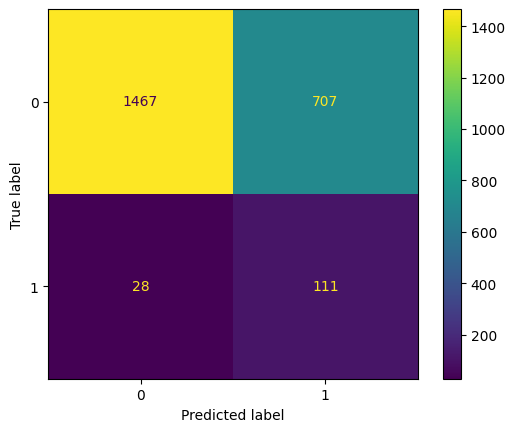

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["FraudFound"], y_pred=pred_val)

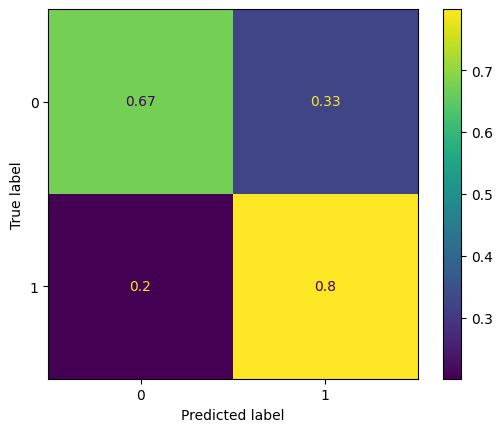

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["FraudFound"], y_pred=pred_val, normalize="true")

Vemos que de los que si hicieron fraude, el modelo detecta al 87%.

In [ ]:
tuner_best_model.feature_importances_

array([0.        , 0.        , 0.0416859 , 0.        , 0.00110673,
       0.00978445, 0.        , 0.01390468, 0.        , 0.        ,
       0.0092089 , 0.01791449, 0.        , 0.00956636, 0.05618873,
       0.01698176, 0.        , 0.05510424, 0.00346092, 0.00588688,
       0.00802572, 0.00290994, 0.        , 0.00181108, 0.        ,
       0.03034853, 0.01031577, 0.00486316, 0.0066428 , 0.        ,
       0.05526935, 0.01142512, 0.00630846, 0.00998875, 0.03609344,
       0.11082007, 0.00512698, 0.01404997, 0.11583177, 0.00441035,
       0.        , 0.03423665, 0.01181694, 0.00878631, 0.00731678,
       0.01033096, 0.00705163, 0.0330149 , 0.01171198, 0.17603122,
       0.01242454, 0.01224286], dtype=float32)

In [ ]:
import pandas as pd # Make sure pandas is imported

importances = pd.Series(
    data=tuner_best_model.feature_importances_,
    index=enconded_train_data[features].columns # Get the column names of the DataFrame
)

In [ ]:
importances.sort_values()

AccidentArea                           0.000000
Vehiculo_mayor5                        0.000000
NumberOfCars                           0.000000
VehicleCategory                        0.000000
NumberOfCars-Vehiculo_mayor5           0.000000
WitnessPresent                         0.000000
MaritalStatus2                         0.000000
PoliceReportFiled                      0.000000
PastNumberOfClaims                     0.000000
WeekOfMonthClaimed                     0.000000
VehiclePrice                           0.000000
Sex                                    0.000000
Days:Policy-Accident                   0.001107
DriverType                             0.001811
Weekend_Claimed                        0.002910
Trimestre                              0.003461
WitnessPresent-PoliceReportFiled       0.004410
Year                                   0.004863
DaysPolicy-Claim-PastNumberOfClaims    0.005127
Trim_Claimed                           0.005887
RepNumber                              0.006308
WeekOfMonth                            0.006643
AccidentArea-DaysPolicy-Accident       0.007052
AgentType-NumberOfSuppliments          0.007317
Weekend                                0.008026
Make_lujo-VehiclePrice                 0.008786
AgentType                              0.009209
AgeBucket                              0.009566
Days:Policy-Claim                      0.009784
ValorSeguro                            0.009989
Age                                    0.010316
Sex-AgeOfPolicyHolder                  0.010331
DriverRating                           0.011425
PoliceReportFiled-DaysPolicy-Claim     0.011712
Weekend_Claimed-Trim_Claimed           0.011817
FraudRiskScore                         0.012243
AgeBucket-MaritalStatus2               0.012425
AgeOfPolicyHolder                      0.013905
AgeOfPolicyHolder-MaritalStatus2       0.014050
Make_lujo                              0.016982
NumberOfSuppliments                    0.017914
BasePolicy                             0.030349
AddressChange-Claim2-NumberOfCars      0.033015
BasePolicy-VehicleCategory             0.034237
PolicyType                             0.036093
Fault                                  0.041686
AddressChange-Claim2                   0.055104
Deductible                             0.055269
Deducible_mayor400                     0.056189
PolicyType-VehiclePrice                0.110820
AccidentArea-Fault                     0.115832
Fault-PolicyType                       0.176031
dtype: float32

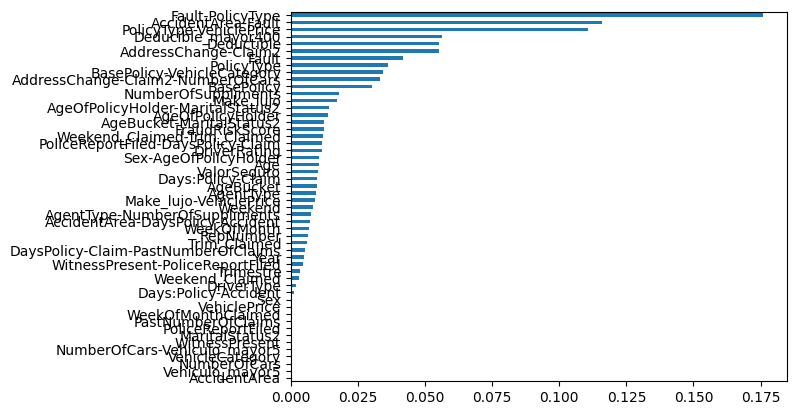

In [ ]:
importances = pd.Series(
    data=tuner_best_model.feature_importances_,
    index=enconded_train_data[features].columns # Get the column names of the DataFrame
)

importances.sort_values().plot.barh()
plt.show() # this will display the plot

In [ ]:
explainer = shap.TreeExplainer(
    tuner_best_model,
    data=enconded_train_data[features].sample(n=1000, random_state=1),
    model_output="probability"
)

In [ ]:
explanation = explainer(enconded_val_data[features])

In [ ]:
explanation.shape

(2313, 52)

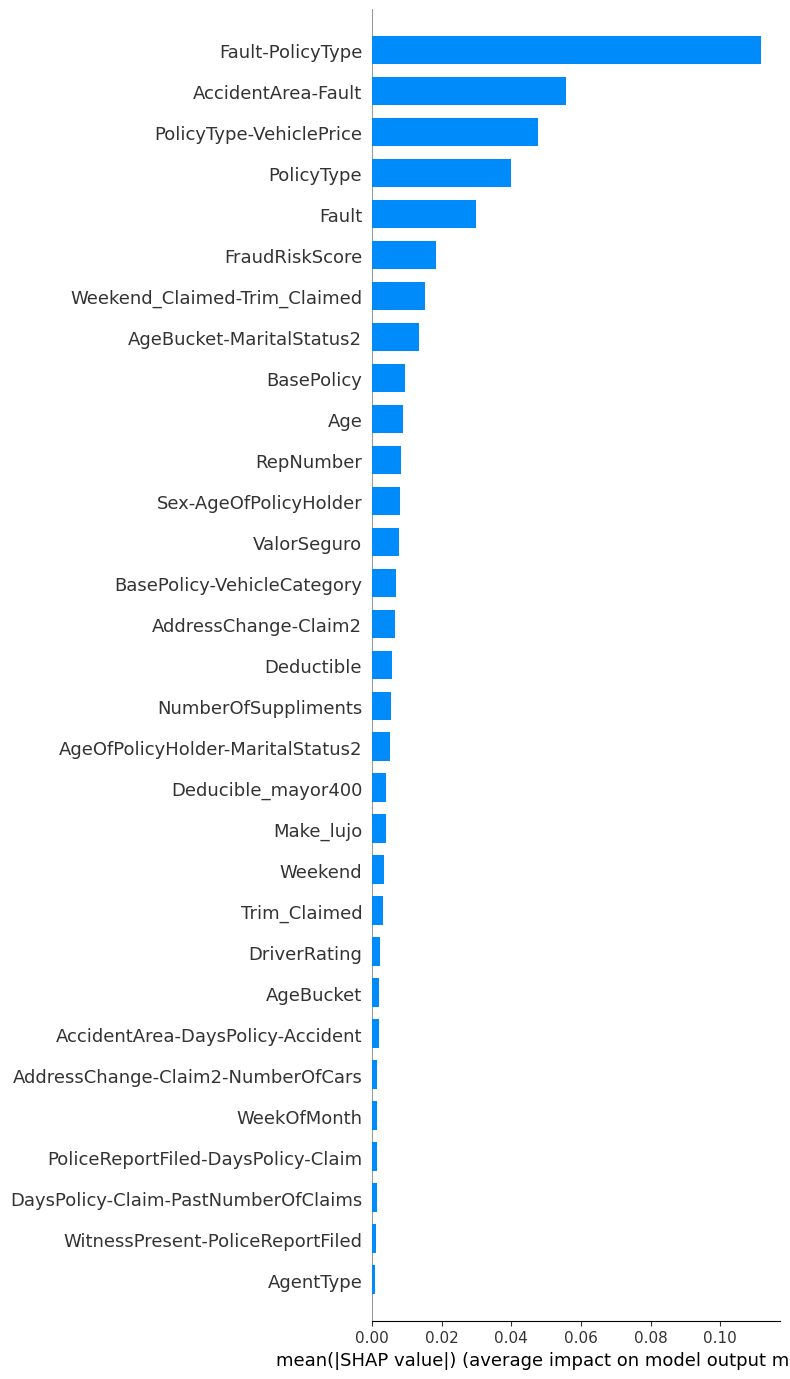

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[features], plot_type="bar", max_display=31)

Una de las variables que mayor importancia tiene es:

In [ ]:
# prompt: quiero los importances[importances >0].index.tolist() ordenados de mayor a menor

sorted_important_features = importances[importances > 0].sort_values(ascending=False).index.tolist()
print(sorted_important_features)


['Fault-PolicyType', 'AccidentArea-Fault', 'PolicyType-VehiclePrice', 'Deducible_mayor400', 'Deductible', 'AddressChange-Claim2', 'Fault', 'PolicyType', 'BasePolicy-VehicleCategory', 'AddressChange-Claim2-NumberOfCars', 'BasePolicy', 'NumberOfSuppliments', 'Make_lujo', 'AgeOfPolicyHolder-MaritalStatus2', 'AgeOfPolicyHolder', 'AgeBucket-MaritalStatus2', 'FraudRiskScore', 'Weekend_Claimed-Trim_Claimed', 'PoliceReportFiled-DaysPolicy-Claim', 'DriverRating', 'Sex-AgeOfPolicyHolder', 'Age', 'ValorSeguro', 'Days:Policy-Claim', 'AgeBucket', 'AgentType', 'Make_lujo-VehiclePrice', 'Weekend', 'AgentType-NumberOfSuppliments', 'AccidentArea-DaysPolicy-Accident', 'WeekOfMonth', 'RepNumber', 'Trim_Claimed', 'DaysPolicy-Claim-PastNumberOfClaims', 'Year', 'WitnessPresent-PoliceReportFiled', 'Trimestre', 'Weekend_Claimed', 'DriverType', 'Days:Policy-Accident']


| **Variable**               | **Descripción**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Month**                 | El mes en que ocurrió el accidente.                                              |
| **WeekOfMonth**           | La semana del mes en que ocurrió el accidente.                                   |
| **DayOfWeek**             | El día de la semana en que ocurrió el accidente.                                 |
| **Make**                  | El fabricante del vehículo involucrado en el accidente (ejemplo: Honda, Ford, Toyota, etc.). |
| **AccidentArea**          | Indica si el accidente ocurrió en una zona urbana o rural.                       |
| **DayOfWeekClaimed**      | El día de la semana en que se presentó la reclamación del seguro.                |
| **MonthClaimed**          | El mes en que se presentó la reclamación del seguro.                             |
| **WeekOfMonthClaimed**    | La semana del mes en que se presentó la reclamación del seguro.                  |
| **Sex**                   | El género del titular de la póliza (Masculino o Femenino).                       |
| **MaritalStatus**         | El estado civil del titular de la póliza.                                        |
| **Age**                   | La edad del titular de la póliza.                                                |
| **Fault**                 | Indica quién fue el culpable del accidente (ejemplo: Titular de la póliza, Tercero). |
| **PolicyType**            | El tipo de póliza de seguro que tiene el titular (ejemplo: Sport, Sedán, Utilitario). |
| **VehicleCategory**       | La categoría del vehículo asegurado (ejemplo: Sport, Sedán, Utilitario).         |
| **VehiclePrice**          | El rango de precio del vehículo asegurado (ejemplo: 20,000 a 29,000, más de 69,000). |
| **PolicyNumber**          | Un número único que identifica la póliza de seguro.                              |
| **RepNumber**             | Número de representante (parece estar sin descripción en la tabla).              |
| **Deductible**            | La cantidad deducible que el titular debe pagar antes de que el seguro cubra los costos restantes. |
| **DriverRating**          | Una calificación que evalúa el desempeño de seguridad del conductor.             |
| **Days:Policy-Accident**  | El número de días entre el inicio de la póliza y el accidente.                   |
| **Days:Policy-Claim**     | El número de días entre el inicio de la póliza y la presentación de la reclamación. |
| **PastNumberOfClaims**    | El número de reclamos anteriores realizados por el titular de la póliza.         |
| **AgeOfVehicle**          | La antigüedad del vehículo asegurado.                                            |
| **AgeOfPolicyHolder**     | La categoría de edad del titular de la póliza (ejemplo: 26 a 30, 31 a 35, etc.). |
| **PoliceReportFiled**     | Indica si se presentó un informe policial por el accidente (Sí, No).             |
| **WitnessPresent**        | Indica si hubo un testigo presente en el momento del accidente (Sí, No).         |
| **AgentType**             | El tipo de agente de seguros (ejemplo: Externo, Interno).                        |
| **NumberOfSupplements**   | El número de documentos adicionales o suplementos presentados con la reclamación. |
| **AddressChange-Claim**   | Indica si la dirección del titular de la póliza cambió después de presentar la reclamación. |
| **NumberOfCars**          | El número de vehículos que posee el titular de la póliza.                        |
| **Year**                  | El año en que ocurrió el accidente.                                              |
| **BasePolicy**            | El tipo básico de cobertura del seguro (ejemplo: Responsabilidad, Colisión, Cobertura Total). |
| **FraudFound**            | Indica si la reclamación se consideró fraudulenta (Sí, No).                      |


In [ ]:
x = pd.concat([train_data["Fault-PolicyType"], enconded_train_data["Fault-PolicyType"]], axis=1)
x.columns = ["original", "encoded"]

In [ ]:
x.drop_duplicates().sort_values("encoded")

original   encoded
5732        Third Party - Sedan - Liability  0.001965
58        Policy Holder - Sedan - Liability  0.008054
77          Third Party - Sport - Collision  0.008066
244         Third Party - Sedan - Collision  0.009892
2151       Third Party - Sedan - All Perils  0.010591
12427    Third Party - Utility - All Perils  0.031370
3832    Policy Holder - Utility - Liability  0.035775
9362     Policy Holder - Sport - All Perils  0.039928
2574       Third Party - Sport - All Perils  0.051279
13430     Third Party - Utility - Liability  0.051981
0         Policy Holder - Sport - Liability  0.051981
6468      Policy Holder - Sedan - Collision  0.087082
13354   Policy Holder - Utility - Collision  0.100357
13658  Policy Holder - Utility - All Perils  0.156863
14698    Policy Holder - Sedan - All Perils  0.164103
4096      Policy Holder - Sport - Collision  0.252026

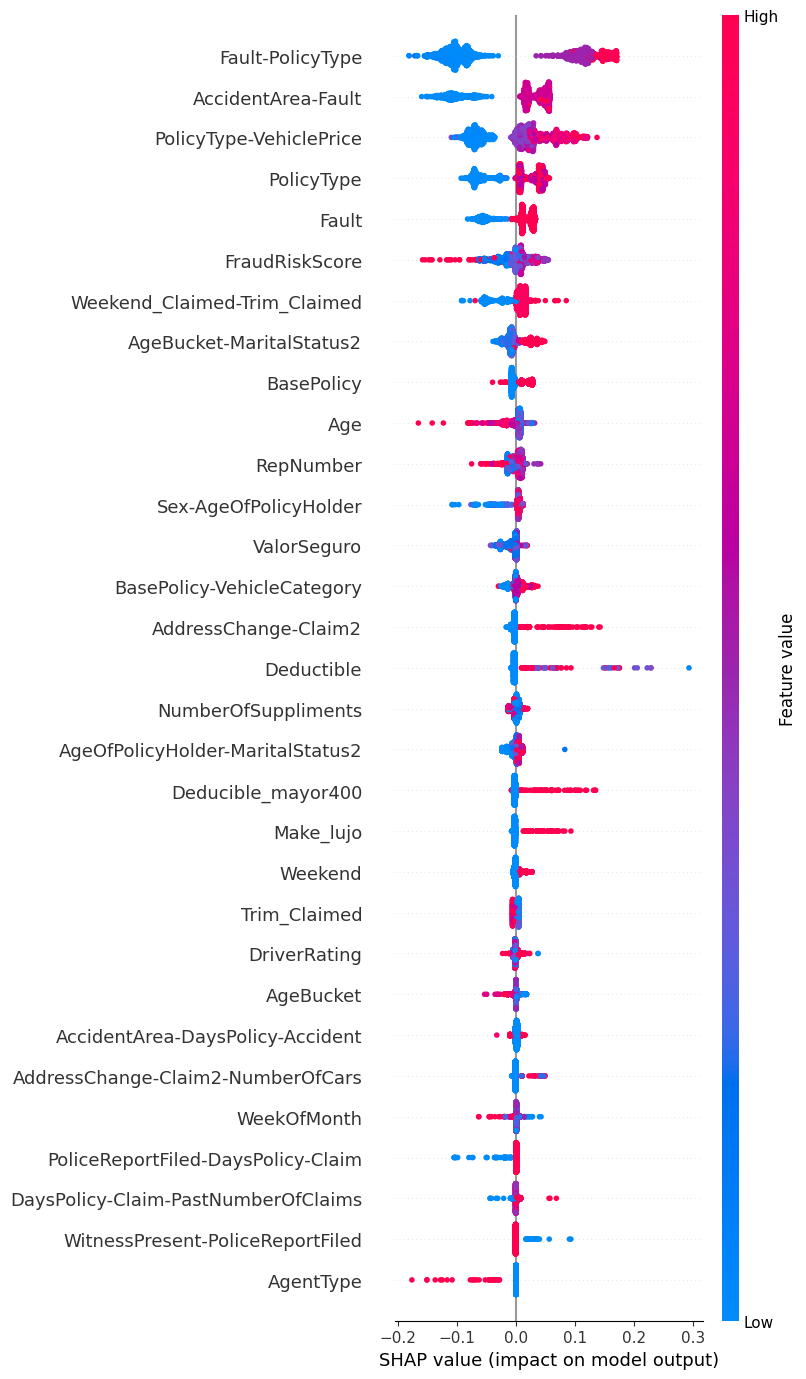

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[features], max_display=31)

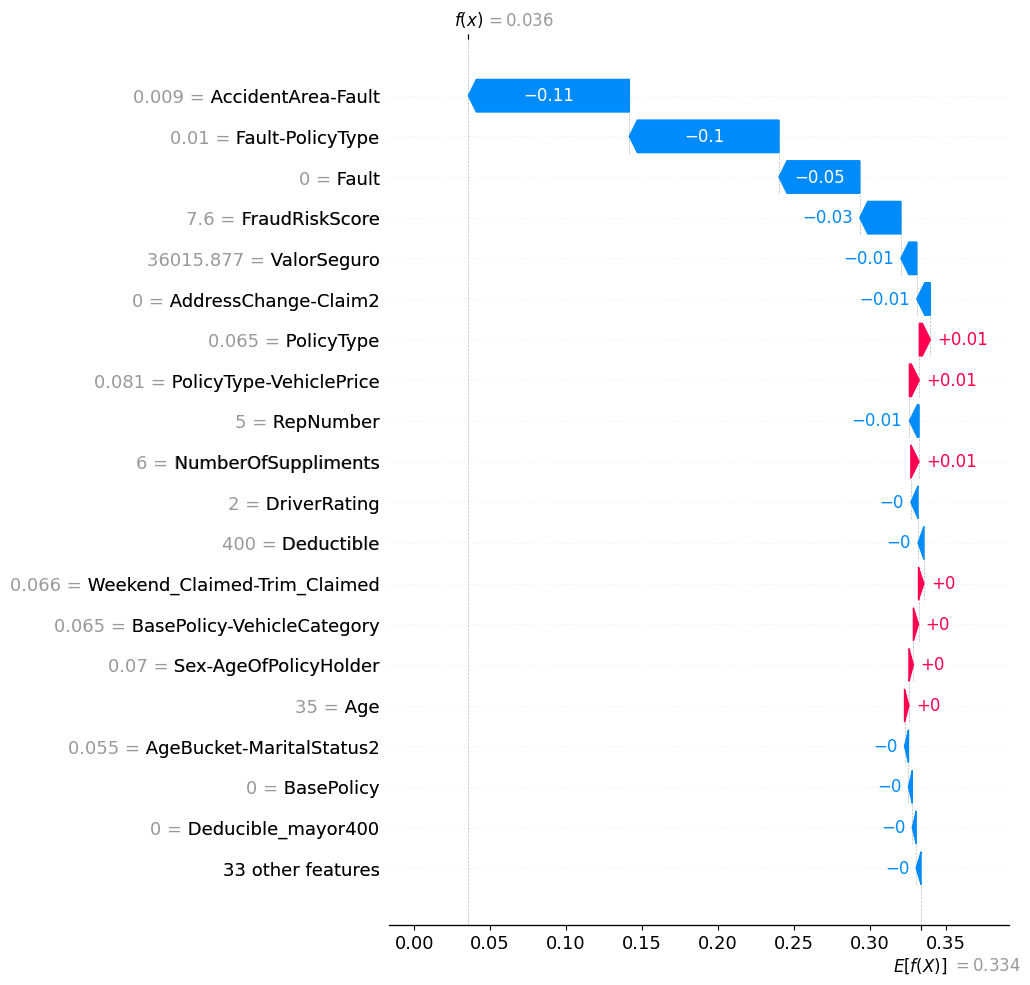

In [ ]:
shap.plots.waterfall(explanation[8], max_display=20)

# Round 2

In [ ]:
low_importance_features = importances[importances <= 0].index.tolist()
low_importance_features

['AccidentArea',
 'Sex',
 'VehiclePrice',
 'PastNumberOfClaims',
 'PoliceReportFiled',
 'WitnessPresent',
 'NumberOfCars',
 'MaritalStatus2',
 'Vehiculo_mayor5',
 'VehicleCategory',
 'WeekOfMonthClaimed',
 'NumberOfCars-Vehiculo_mayor5']

In [ ]:
low_importance=[
   'AccidentArea',
 'Sex',
 'Days:Policy-Accident',
 'PoliceReportFiled',
 'WitnessPresent',
 'NumberOfSuppliments',
 'Deducible_mayor400',
 'Make_lujo',
 'MaritalStatus2',
 'VehicleCategory',
 'DriverRating',
 'NumberOfCars-Vehiculo_mayor5',
   'AgeOfPolicyHolder-MaritalStatus2',
   'AgentType', 'Weekend', 'DriverType', 'AccidentArea-DaysPolicy-Accident','Days:Policy-Claim', 'Weekend_Claimed', 'Vehiculo_mayor5', 'BasePolicy','VehiclePrice', 'NumberOfCars', 'Trim_Claimed'
   ]

In [ ]:
new_features = features

In [ ]:
# prompt: eliminar de new_features lo que esta en "low_importance"
new_features = [feature for feature in new_features if feature not in low_importance]
new_features

['Fault',
 'PastNumberOfClaims',
 'AgeOfPolicyHolder',
 'AgeBucket',
 'AddressChange-Claim2',
 'Trimestre',
 'Age',
 'Year',
 'WeekOfMonth',
 'WeekOfMonthClaimed',
 'Deductible',
 'RepNumber',
 'ValorSeguro',
 'PolicyType',
 'PolicyType-VehiclePrice',
 'DaysPolicy-Claim-PastNumberOfClaims',
 'AccidentArea-Fault',
 'WitnessPresent-PoliceReportFiled',
 'BasePolicy-VehicleCategory',
 'Weekend_Claimed-Trim_Claimed',
 'Make_lujo-VehiclePrice',
 'AgentType-NumberOfSuppliments',
 'Sex-AgeOfPolicyHolder',
 'AddressChange-Claim2-NumberOfCars',
 'PoliceReportFiled-DaysPolicy-Claim',
 'Fault-PolicyType',
 'AgeBucket-MaritalStatus2',
 'FraudRiskScore']

## Baseline model

In [ ]:
baseline_model = xgb.XGBClassifier(random_state=1)

In [ ]:
baseline_model.fit(X=enconded_train_data[new_features], y=enconded_train_data["FraudFound"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
pred_train = baseline_model.predict(enconded_train_data[new_features])
pred_val = baseline_model.predict(enconded_val_data[new_features])
pred_test = baseline_model.predict(enconded_test_data[new_features])

In [ ]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["FraudFound"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10149
           1       1.00      0.73      0.84       645

    accuracy                           0.98     10794
   macro avg       0.99      0.87      0.92     10794
weighted avg       0.98      0.98      0.98     10794



In [ ]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["FraudFound"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.55      0.04      0.08       139

    accuracy                           0.94      2313
   macro avg       0.74      0.52      0.52      2313
weighted avg       0.92      0.94      0.92      2313



In [ ]:
enconded_train_data["FraudFound"].value_counts()

FraudFound
0    10149
1      645
Name: count, dtype: int64

In [ ]:
scale_pos_weight = round(10149/645, 2)

In [ ]:
scale_pos_weight

15.73

## Hyperparameter tuning

In [ ]:
params_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [3, 10, 50, 100],
    "subsample": [0.3, 0.6, 0.9],
    "colsample_bytree": [0.3, 0.6, 0.9],
    "colsample_bynode": [0.3, 0.6, 0.9]
}

tuner_round2 = GridSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=1),
    param_grid=params_grid,
    scoring="recall",
    return_train_score=True,
    n_jobs=-1,
    verbose=2
)

In [132]:
tuner_round2.fit(X=enconded_train_data[new_features], y=enconded_train_data["FraudFound"])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.3, 0.6, 0.9],
                         'colsample_bytree': [0.3, 0.6, 0.9],
                         'max_depth': [3, 10, 50, 100],
                         'n_estimators': [20, 50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=2)

In [133]:
tuner2_best_model = tuner_round2.best_estimator_

In [134]:
pred_train = tuner2_best_model.predict(enconded_train_data[new_features])
pred_val = tuner2_best_model.predict(enconded_val_data[new_features])
pred_test = tuner2_best_model.predict(enconded_test_data[new_features])

In [135]:
# pred_train = tuner2_best_model.predict(enconded_train_data[new_features])
# pred_val = tuner2_best_model.predict(enconded_val_data[new_features])

pred_train = (tuner2_best_model.predict_proba(enconded_train_data[new_features])[:,1] > 0.4).astype("int")
pred_val = (tuner2_best_model.predict_proba(enconded_val_data[new_features])[:,1] > 0.4).astype("int")
pred_test = (tuner2_best_model.predict_proba(enconded_test_data[new_features])[:,1] > 0.4).astype("int")

In [136]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["FraudFound"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     10149
           1       0.13      0.96      0.22       645

    accuracy                           0.60     10794
   macro avg       0.56      0.77      0.48     10794
weighted avg       0.94      0.60      0.70     10794



In [137]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["FraudFound"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      2174
           1       0.13      0.94      0.23       139

    accuracy                           0.62      2313
   macro avg       0.56      0.77      0.49      2313
weighted avg       0.94      0.62      0.72      2313



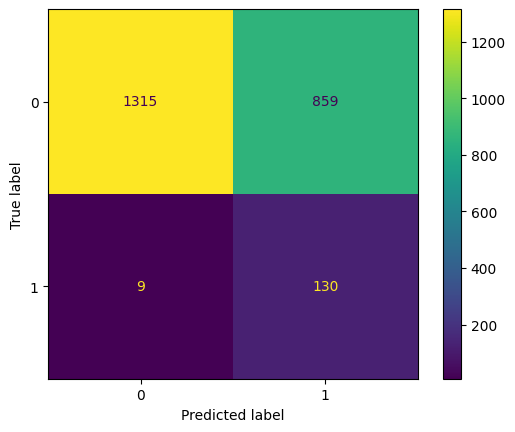

In [138]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["FraudFound"], y_pred=pred_val)

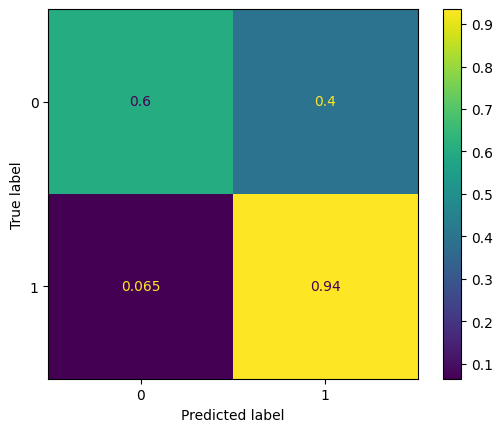

In [139]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["FraudFound"], y_pred=pred_val, normalize="true")

Vemos que de los que si hicieron fraude, el modelo detecta al 90%.

In [140]:
tuner2_best_model.feature_importances_

array([0.14359497, 0.        , 0.00520847, 0.01956224, 0.00583457,
       0.00390226, 0.01101251, 0.00394673, 0.00263545, 0.00641056,
       0.10358416, 0.01070024, 0.00653919, 0.26920906, 0.07237516,
       0.00294896, 0.04361057, 0.00578518, 0.04720669, 0.01462364,
       0.02691408, 0.00983756, 0.02145762, 0.05862331, 0.00663398,
       0.07939694, 0.01078211, 0.00766385], dtype=float32)

In [141]:
importances = pd.Series(
    data=tuner2_best_model.feature_importances_,
    index=enconded_train_data[new_features].columns # Get the column names of the DataFrame
)

In [142]:
importances.sort_values()

PastNumberOfClaims                     0.000000
WeekOfMonth                            0.002635
DaysPolicy-Claim-PastNumberOfClaims    0.002949
Trimestre                              0.003902
Year                                   0.003947
AgeOfPolicyHolder                      0.005208
WitnessPresent-PoliceReportFiled       0.005785
AddressChange-Claim2                   0.005835
WeekOfMonthClaimed                     0.006411
ValorSeguro                            0.006539
PoliceReportFiled-DaysPolicy-Claim     0.006634
FraudRiskScore                         0.007664
AgentType-NumberOfSuppliments          0.009838
RepNumber                              0.010700
AgeBucket-MaritalStatus2               0.010782
Age                                    0.011013
Weekend_Claimed-Trim_Claimed           0.014624
AgeBucket                              0.019562
Sex-AgeOfPolicyHolder                  0.021458
Make_lujo-VehiclePrice                 0.026914
AccidentArea-Fault                     0.043611
BasePolicy-VehicleCategory             0.047207
AddressChange-Claim2-NumberOfCars      0.058623
PolicyType-VehiclePrice                0.072375
Fault-PolicyType                       0.079397
Deductible                             0.103584
Fault                                  0.143595
PolicyType                             0.269209
dtype: float32

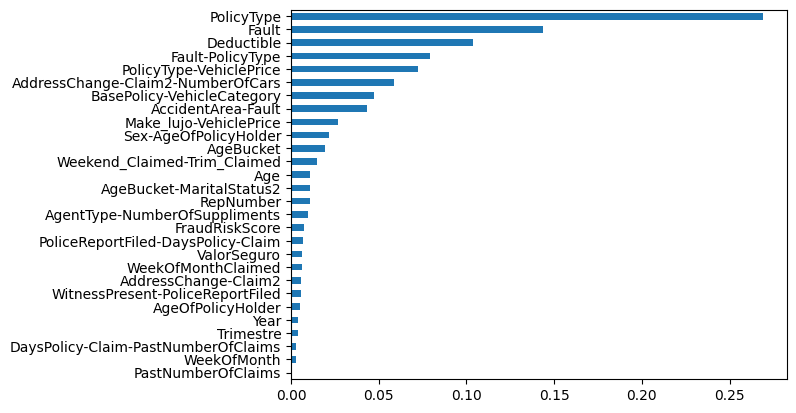

In [143]:
importances = pd.Series(
    data=tuner2_best_model.feature_importances_,
    index=enconded_train_data[new_features].columns # Get the column names of the DataFrame
)

importances.sort_values().plot.barh()
plt.show() # this will display the plot

In [144]:
explainer = shap.TreeExplainer(
    tuner2_best_model,
    data=enconded_train_data[new_features].sample(n=1000, random_state=1),
    model_output="probability"
)

In [145]:
explanation = explainer(enconded_val_data[new_features])

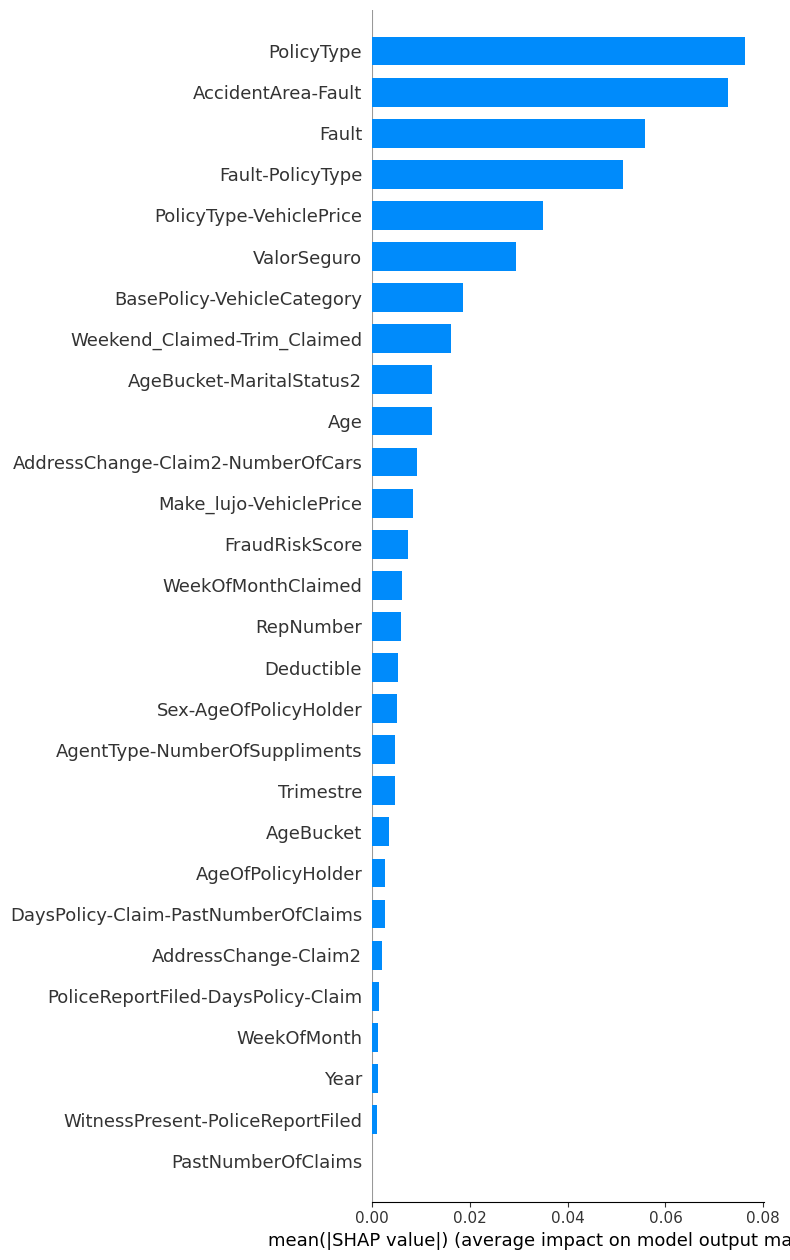

In [146]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[new_features], plot_type="bar", max_display=31)

Una de las variables que mayor importancia tiene es:

In [147]:
# prompt: quiero los importances[importances >0].index.tolist() ordenados de mayor a menor

sorted_important_features = importances[importances > 0].sort_values(ascending=False).index.tolist()
print(sorted_important_features)


['PolicyType', 'Fault', 'Deductible', 'Fault-PolicyType', 'PolicyType-VehiclePrice', 'AddressChange-Claim2-NumberOfCars', 'BasePolicy-VehicleCategory', 'AccidentArea-Fault', 'Make_lujo-VehiclePrice', 'Sex-AgeOfPolicyHolder', 'AgeBucket', 'Weekend_Claimed-Trim_Claimed', 'Age', 'AgeBucket-MaritalStatus2', 'RepNumber', 'AgentType-NumberOfSuppliments', 'FraudRiskScore', 'PoliceReportFiled-DaysPolicy-Claim', 'ValorSeguro', 'WeekOfMonthClaimed', 'AddressChange-Claim2', 'WitnessPresent-PoliceReportFiled', 'AgeOfPolicyHolder', 'Year', 'Trimestre', 'DaysPolicy-Claim-PastNumberOfClaims', 'WeekOfMonth']


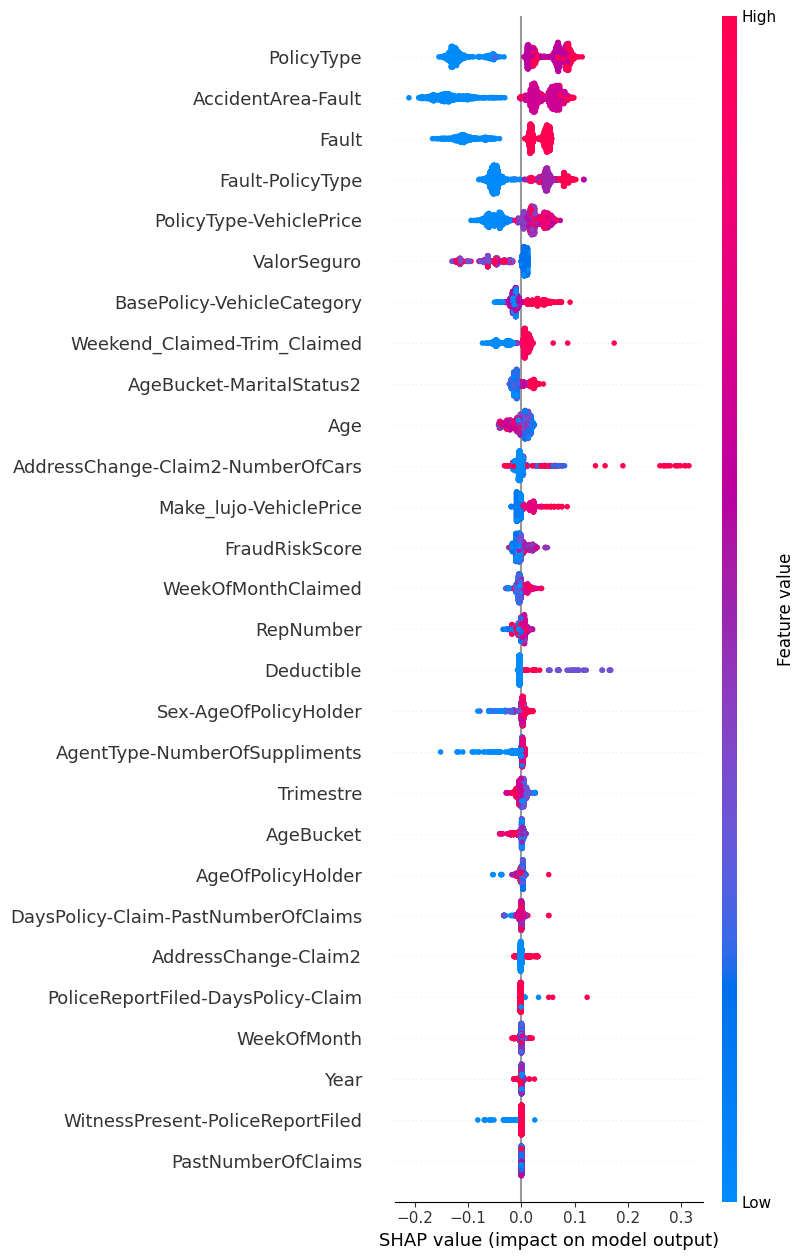

In [148]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[new_features], max_display=31)

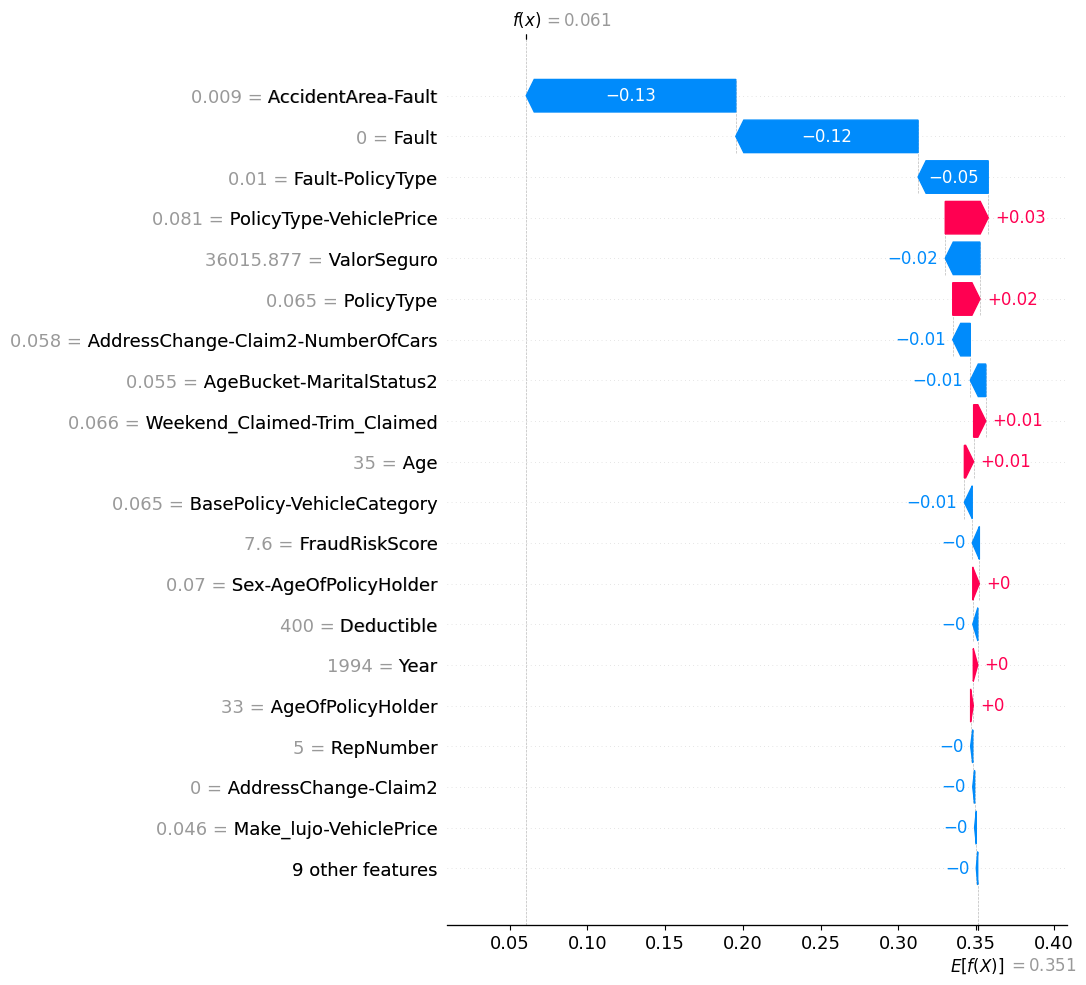

In [149]:
shap.plots.waterfall(explanation[8], max_display=20)

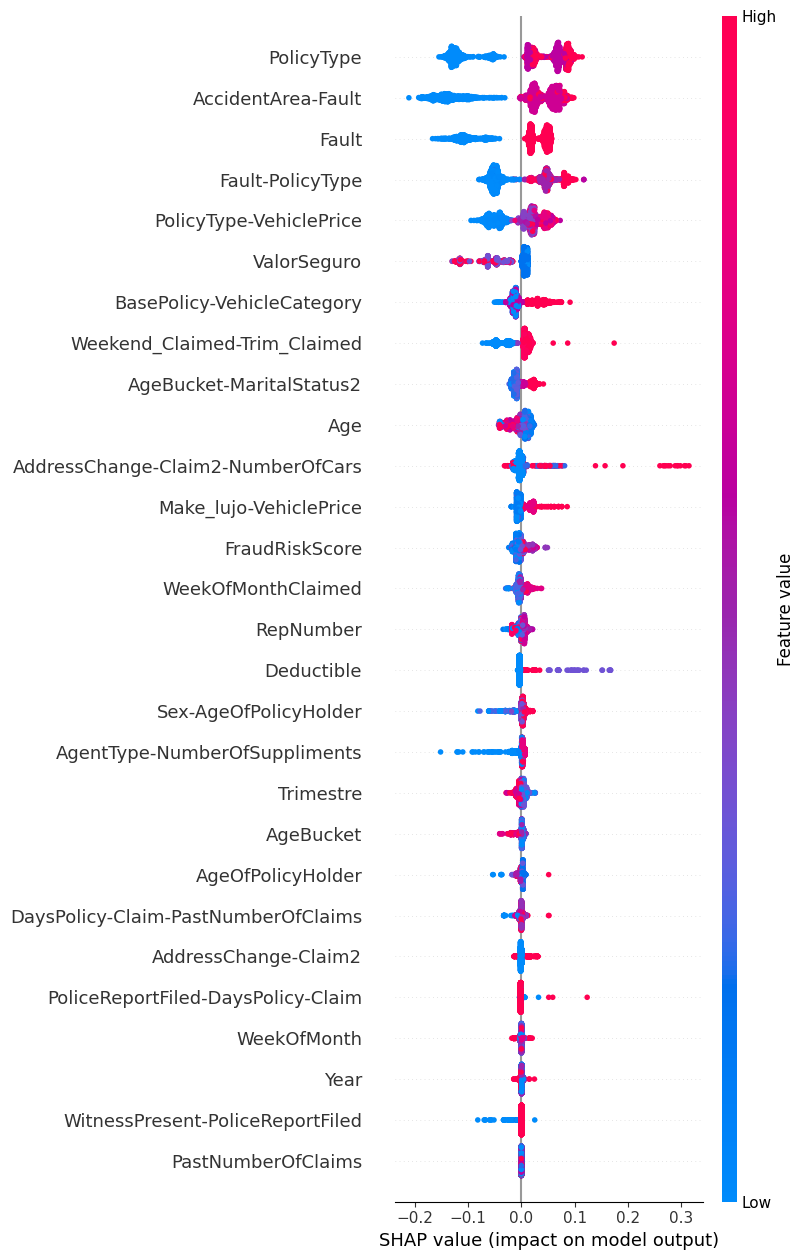

In [150]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[new_features], max_display=31)

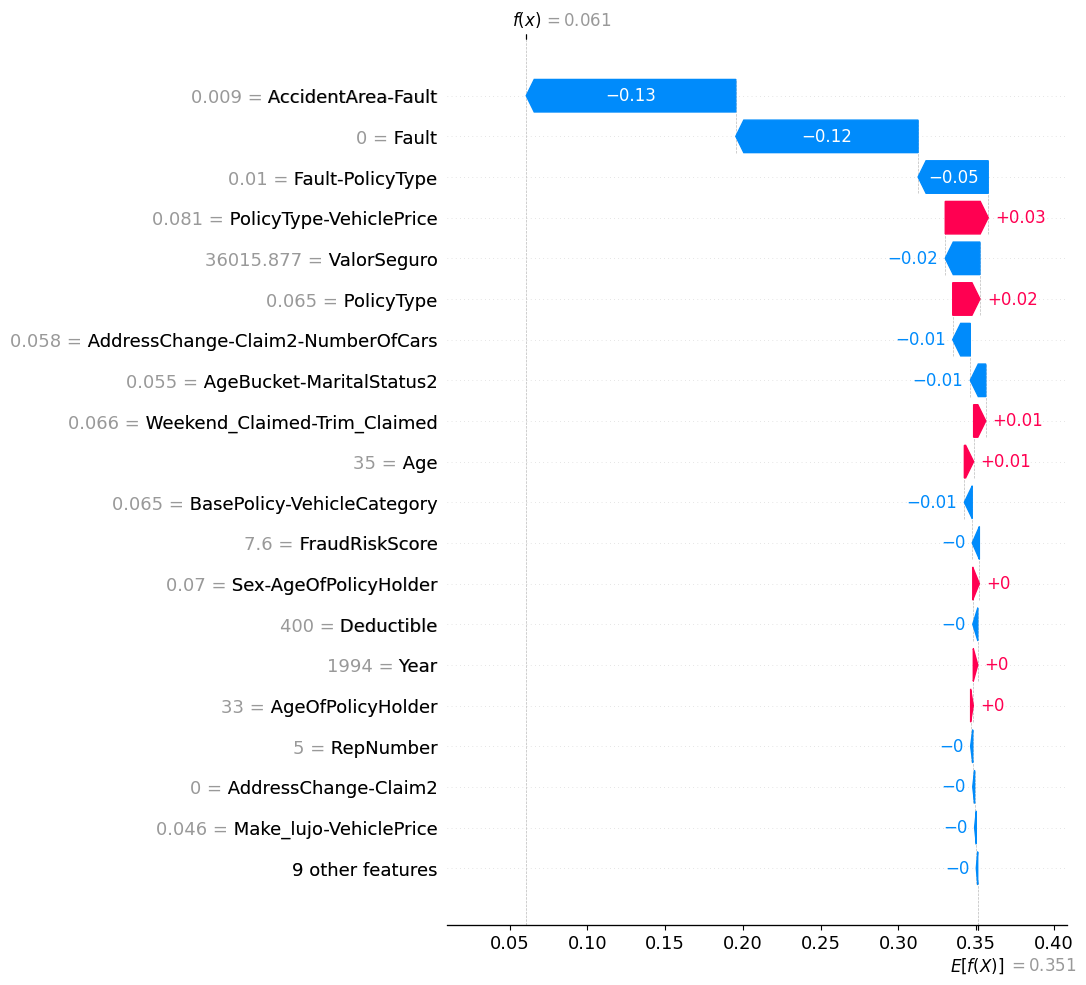

In [151]:
shap.plots.waterfall(explanation[8], max_display=20)

#**Testing**

In [152]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["FraudFound"], y_pred=pred_train))
print("**************************************************************")
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["FraudFound"], y_pred=pred_val))
print("**************************************************************")
print("Testing metrics")
print(classification_report(y_true=enconded_test_data["FraudFound"], y_pred=pred_test))

Training metrics
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     10149
           1       0.13      0.96      0.22       645

    accuracy                           0.60     10794
   macro avg       0.56      0.77      0.48     10794
weighted avg       0.94      0.60      0.70     10794

**************************************************************
Validation metrics
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      2174
           1       0.13      0.94      0.23       139

    accuracy                           0.62      2313
   macro avg       0.56      0.77      0.49      2313
weighted avg       0.94      0.62      0.72      2313

**************************************************************
Testing metrics
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2174
           1       0.13      0.95      0.23       139

    

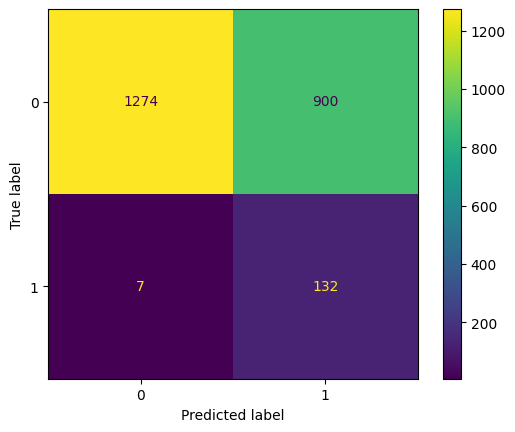

In [153]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_test_data["FraudFound"], y_pred=pred_test)

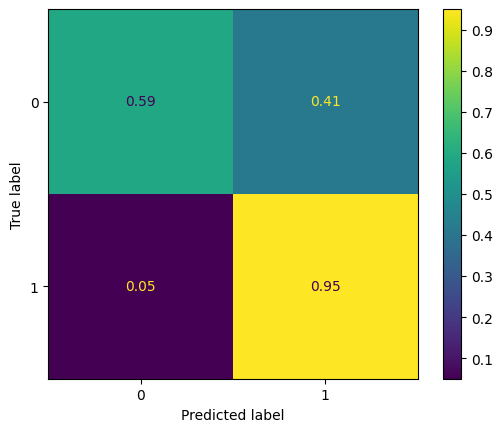

In [154]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_test_data["FraudFound"], y_pred=pred_test, normalize="true")

La matriz de confusión calculada sobre el dataset de testing deben traducirla a KPIs de negocio, preferiblemente KPIs monetarios y reportarla.

In [155]:
enconded_test_data['ValorSeguro'].mean()

34871.449066147856

In [156]:
# Supongamos que tienes predicciones guardadas en 'pred_test'
# Mostrar la matriz de confusión para el conjunto de testing multiplicada por el valor del seguro
print("\nMatriz de confusión (Testing) multiplicada por el valor del seguro:")

# Calculate the confusion matrix and assign it to 'confusion_matrix_data'
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function

confusion_matrix_data = confusion_matrix(y_true=enconded_test_data["FraudFound"], y_pred=pred_test)

# Now, you can use 'confusion_matrix_data'
confusion_matrix_data_final = np.round(confusion_matrix_data, 2) * enconded_test_data['ValorSeguro'].mean()
confusion_matrix_data_final.round(1)


Matriz de confusión (Testing) multiplicada por el valor del seguro:


array([[44426226.1, 31384304.2],
       [  244100.1,  4603031.3]])

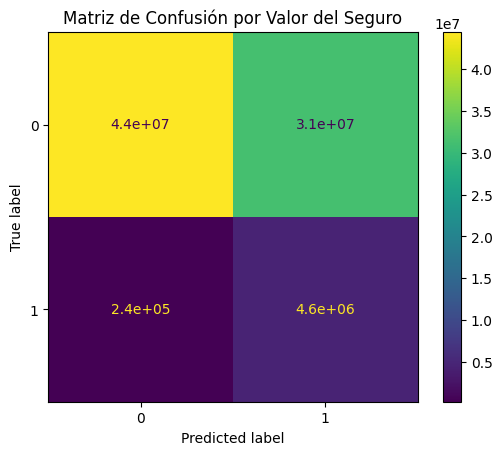

In [157]:
# Multiplica la matriz de confusión por el promedio de la edad
cm_adjusted = confusion_matrix_data* enconded_test_data['ValorSeguro'].mean()

# Crea la visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted)
disp.plot()

# Muestra el gráfico
plt.title('Matriz de Confusión por Valor del Seguro')
plt.show()

In [158]:
# prompt: sumar toda la matriz de confusion_matrix_data_final y ver cuanto porcentaje representan

total_sum = np.sum(confusion_matrix_data_final)
# Calcular el porcentaje de cada elemento respecto al total
percentage_matrix = (confusion_matrix_data_final / total_sum) * 100
print("\nPorcentaje de cada elemento respecto al total:")
print(np.round(percentage_matrix, 2))


Porcentaje de cada elemento respecto al total:
[[55.08 38.91]
 [ 0.3   5.71]]


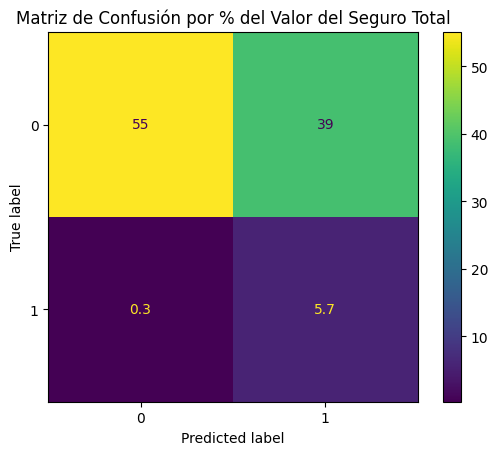

In [159]:
# Crea la visualización
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_matrix)
disp.plot()

# Muestra el gráfico
plt.title('Matriz de Confusión por % del Valor del Seguro Total')
plt.show()

In [160]:
explainer = shap.TreeExplainer(
    tuner2_best_model,
    data=enconded_test_data[new_features].sample(n=1000, random_state=1),
    model_output="probability"
)

In [161]:
explanation = explainer(enconded_test_data[new_features])

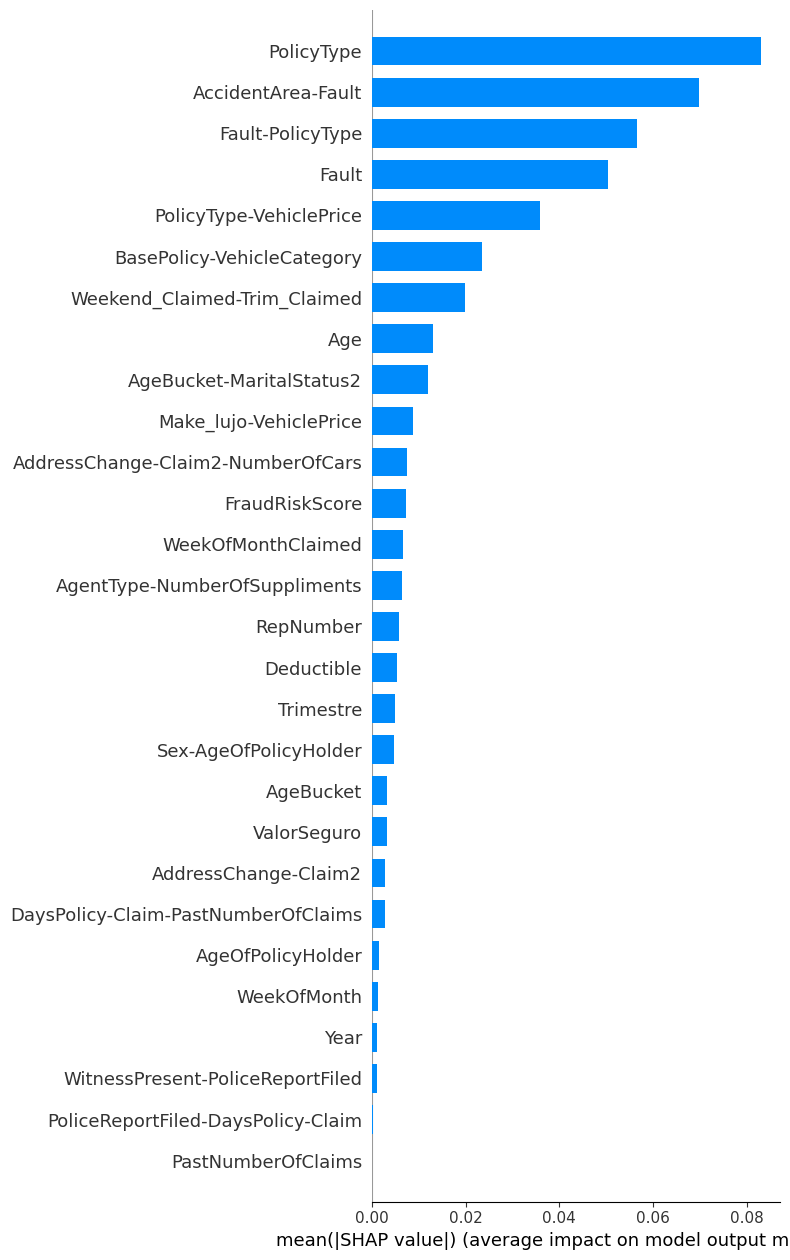

In [162]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_test_data[new_features], plot_type="bar", max_display=31)

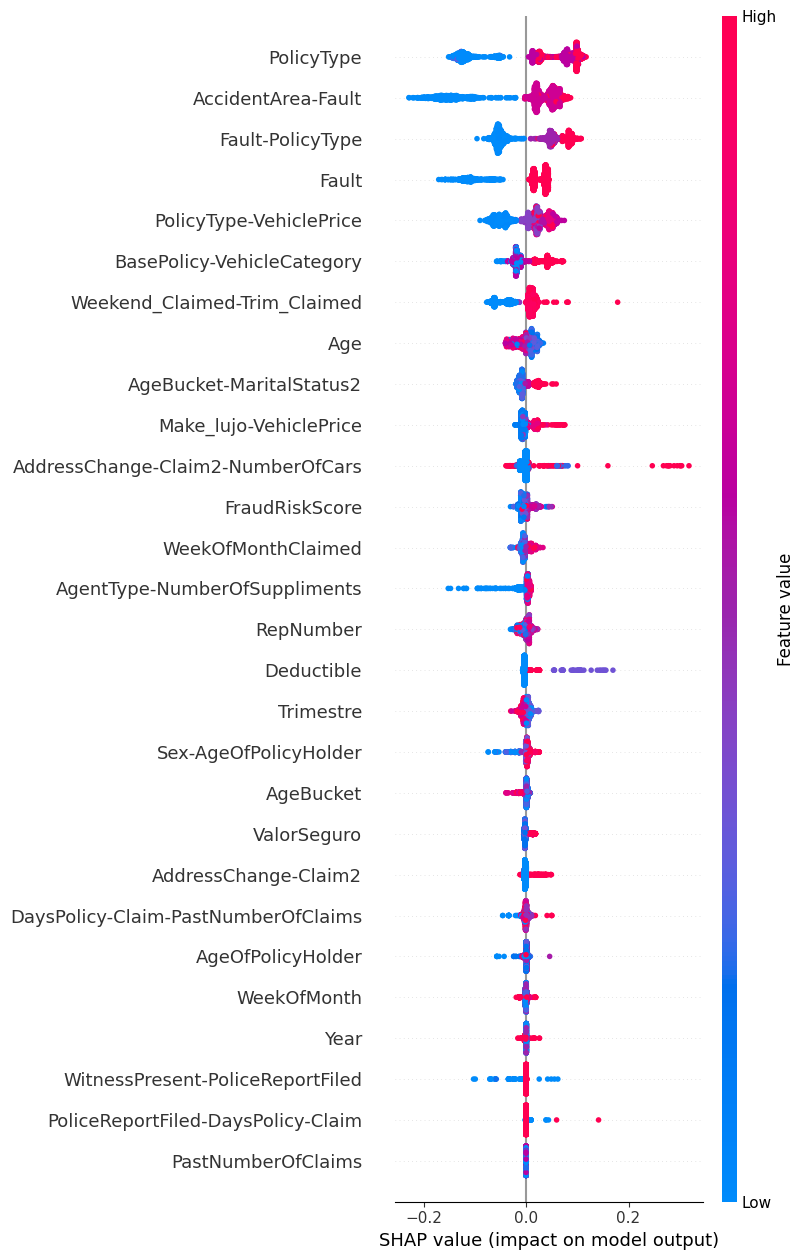

In [163]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_test_data[new_features], max_display=31)

In [ ]:
shap.plots.waterfall(explanation[8], max_display=20)

In [165]:
predicted_FraudFound_proba = tuner2_best_model.predict_proba(enconded_test_data[new_features])[:,1]

In [166]:
predicted_FraudFound_proba

array([0.14498533, 0.7712643 , 0.57085425, ..., 0.1513631 , 0.6164735 ,
       0.09821547], dtype=float32)

In [167]:
enconded_test_data["NewFraudFound"] = ((1 - predicted_FraudFound_proba) * 1000).round(0)

(array([  1.,   7.,  24.,  33.,  93.,  77.,  83.,  93.,  89., 131.,  72.,
         86.,  68.,  58.,  57.,  39.,  20.,  13.,  10.,   1.,   4.,   4.,
          5.,  27.,  82., 225., 204., 182., 311., 214.]),
 array([ 84.        , 114.23332977, 144.46665955, 174.69999695,
        204.93333435, 235.16667175, 265.3999939 , 295.6333313 ,
        325.8666687 , 356.1000061 , 386.33334351, 416.56668091,
        446.79998779, 477.0333252 , 507.2666626 , 537.5       ,
        567.7333374 , 597.9666748 , 628.20001221, 658.43334961,
        688.66668701, 718.90002441, 749.13336182, 779.36663818,
        809.59997559, 839.83331299, 870.06665039, 900.29998779,
        930.5333252 , 960.7666626 , 991.        ]),
 <BarContainer object of 30 artists>)

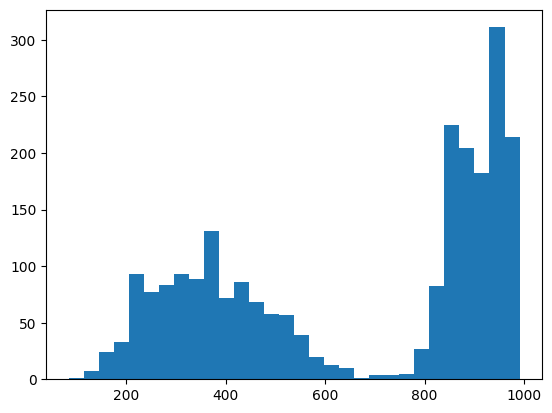

In [168]:
plt.hist(enconded_test_data["NewFraudFound"], bins=30)

In [169]:
enconded_test_data["RiskCategory"] = pd.cut(
    x=enconded_test_data["NewFraudFound"],
    bins=[0, 500, 700, 900, 1001],
    labels=["Extreme Risk", "Moderate Risk", "Regular", "Extremely Good"]
)

In [170]:
enconded_test_data

Month  WeekOfMonth  DayOfWeek       Make  AccidentArea DayOfWeekClaimed  \
7835    Apr            1  Wednesday  Chevrolet             0           Friday   
7625    Aug            1  Wednesday      Mazda             0        Wednesday   
318     May            4   Thursday    Pontiac             0         Thursday   
9480    Jan            4   Saturday      Dodge             1          Tuesday   
8483    Jan            5    Tuesday     Toyota             0         Thursday   
...     ...          ...        ...        ...           ...              ...   
13559   Mar            1   Saturday     Accura             0           Monday   
12523   Mar            2     Sunday      Honda             0         Thursday   
8718    Jan            2    Tuesday     Saturn             0           Friday   
8183    Oct            4  Wednesday      Dodge             0         Thursday   
8428    Nov            1     Friday     Toyota             0          Tuesday   

      MonthClaimed  WeekOfMonthClaimed  Sex MaritalStatus  ...  \
7835           Apr                   2    1       Married  ...   
7625           Aug                   3    0        Single  ...   
318            May                   4    1       Married  ...   
9480           Jan                   4    1       Married  ...   
8483           Feb                   1    1        Single  ...   
...            ...                 ...  ...           ...  ...   
13559          Mar                   2    1        Single  ...   
12523          Mar                   3    0        Single  ...   
8718           Jan                   3    1        Single  ...   
8183           Nov                   1    1       Married  ...   
8428           Nov                   2    1       Married  ...   

       Sex-AgeOfPolicyHolder  AccidentArea-DaysPolicy-Accident  \
7835                0.052117                          0.056815   
7625                0.048628                          0.056815   
318                 0.067220                          0.056815   
9480                0.046072                          0.081130   
8483                0.070305                          0.056815   
...                      ...                               ...   
13559               0.046072                          0.056815   
12523               0.048628                          0.056815   
8718                0.070305                          0.056815   
8183                0.067220                          0.056815   
8428                0.046072                          0.056815   

       AddressChange-Claim2-NumberOfCars  PoliceReportFiled-DaysPolicy-Claim  \
7835                            0.057688                            0.060203   
7625                            0.057688                            0.060203   
318                             0.057688                            0.060203   
9480                            0.057688                            0.060203   
8483                            0.057688                            0.060203   
...                                  ...                                 ...   
13559                           0.130612                            0.060203   
12523                           0.057688                            0.060203   
8718                            0.057688                            0.060203   
8183                            0.057688                            0.060203   
8428                            0.057688                            0.060203   

       Fault-PolicyType  AgeBucket-MaritalStatus2   ValorSeguro  \
7835           0.035775                  0.049091  35687.782767   
7625           0.164103                  0.054591  34487.382767   
318            0.087082                  0.052581  34687.492767   
9480           0.010591                  0.052581  34888.072767   
8483           0.010591                  0.055219  34687.652767   
...                 ...                       ...           ...   
13559          0.

In [171]:
enconded_test_data["RiskCategory"].value_counts()

RiskCategory
Extreme Risk      905
Extremely Good    707
Regular           550
Moderate Risk     151
Name: count, dtype: int64

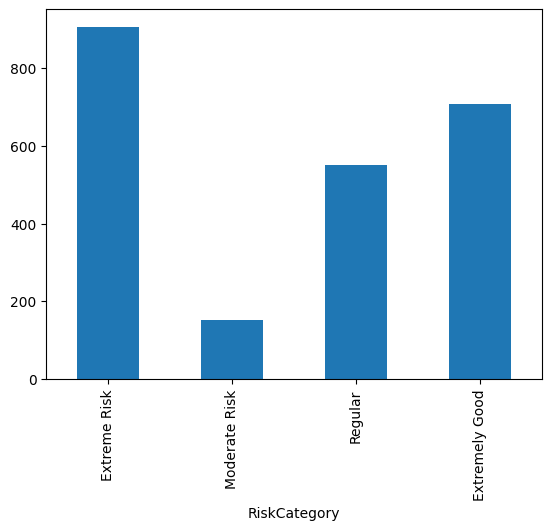

In [172]:
# prompt: quiero a enconded_test_data["RiskCategory"] convertirla en ordinal, y al graficar grafico de barras me salga en orden

import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order for the categories
category_order = ["Extreme Risk", "Moderate Risk", "Regular", "Extremely Good"]

# Create an OrdinalEncoder instance with the specified order
ordinal_encoder = OrdinalEncoder(categories=[category_order], dtype=int)

# Fit and transform the "RiskCategory" column
enconded_test_data["RiskCategory_ordinal"] = ordinal_encoder.fit_transform(enconded_test_data[["RiskCategory"]])

# Now, when you plot a bar chart, the categories will appear in the specified order
enconded_test_data["RiskCategory"].value_counts().loc[category_order].plot(kind="bar")
plt.show()


In [ ]:
print(enconded_train_data['FraudRiskScore'].describe().round(2))
sns.boxplot(data=enconded_train_data, y='FraudRiskScore')

In [ ]:
def categorize_risk(data):
    # Crear la columna 'RiskCategory' en base a 'FraudRiskScore'
    data["RiskCategory"] = pd.cut(
        x=data['FraudRiskScore'],
        bins=[0, 500, 700, 900, 1001],  # Definir los límites para las categorías
        labels=["Extreme Risk", "Moderate Risk", "Regular", "Extremely Good"],  # Etiquetas de categorías
        include_lowest=True  # Incluir el límite inferior en el primer bin
    )

    return data

In [ ]:
# Call the function with your dataframes
enconded_train_data = categorize_risk(enconded_train_data)
enconded_val_data = categorize_risk(enconded_val_data)
enconded_test_data = categorize_risk(enconded_test_data)

In [ ]:
enconded_train_data['RiskCategory'].value_counts()

# Save models

In [ ]:
# !pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(value=ordinal_encoder, filename="ordinal_encoder.bin")

In [ ]:
joblib.dump(value=onehot_encoder, filename="onehot_encoder.bin")

In [ ]:
joblib.dump(value=target_encoder, filename="target_encoder.bin")

In [ ]:
joblib.dump(value=new_features, filename="features.bin")

In [ ]:
joblib.dump(value=tuner2_best_model, filename="model.bin")